# Description

- ***Context***
 - *There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.*


 - *In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold.*
 - *There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.*


 - *As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.*

 

- ***Data Description***
 - *The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.*


- ***Data Dictionary***
 - *S.No.: Serial number*
 - *Name: Name of the car which includes brand name and model name*
 - *Location: Location in which the car is being sold or is available for purchase (cities)*
 - *Year: Manufacturing year of the car*
 - *Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km*
 - *Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)*
 - *Transmission: The type of transmission used by the car (Automatic/Manual)*
 - *Owner: Type of ownership*
 - *Mileage: The standard mileage offered by the car company in kmpl or km/kg*
 - *Engine: The displacement volume of the engine in CC*
 - *Power: The maximum power of the engine in bhp*
 - *Seats: The number of seats in the car*
 - *New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)*
 - *Price: The price of the used car in INR Lakhs*

# Probleme definition
In the context of a slowdown in new car sales on the one hand and in the other hand of huge demand for used cars in the Indian Market today, a start-up company, Cars4U, that find footholes in this market, asks us to to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

- ***Base on the uncertainty in both pricing and supply of used cars, we have to come up with a pricing model that can effectively predict the price of used cars in order to help the business in devising profitable strategies using differential pricing***

# Exploratory Data Analysis

## Loading libraries

In [2184]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

plt.style.use("default")


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (
    train_test_split,
)  # Sklearn package's randomized data splitting function

from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)  # To check model performance

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Hide all warnings
import warnings

warnings.filterwarnings("ignore")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

## Loading and exploring the data¶

In this section the goals are to load the data into python and then to check its basic properties. This will include the dimension, column types and names, and missingness counts.

In [2185]:
df = pd.read_csv("Cars4U.csv")

print(
    f"There are {df.shape[0]} rows and {df.shape[1]} columns."
)  # Shape of the data with f-string

np.random.seed(1)  # looking at 10 random rows
df.sample(n=10)  # setting of the random seed via np.random.seed so that

There are 7253 rows and 14 columns.


S.No.                                       Name    Location  Year  \
2397   2397             Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3777   3777                     Maruti Wagon R VXI 1.2       Kochi  2015   
4425   4425                     Ford Endeavour 4x2 XLT   Hyderabad  2007   
3661   3661  Mercedes-Benz E-Class E250 CDI Avantgrade  Coimbatore  2016   
4514   4514       Hyundai Xcent 1.2 Kappa AT SX Option       Kochi  2016   
599     599             Toyota Innova Crysta 2.8 ZX AT  Coimbatore  2019   
186     186  Mercedes-Benz E-Class E250 CDI Avantgrade   Bangalore  2014   
305     305     Audi A6 2011-2015 2.0 TDI Premium Plus       Kochi  2014   
4582   4582                      Hyundai i20 1.2 Magna     Kolkata  2011   
5434   5434           Honda WR-V Edge Edition i-VTEC S       Kochi  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
2397              21460    Petrol       Manual      First   17.0 kmpl   
3777              49818    Petrol       Manual      First   21.5 kmpl   
4425             130000    Diesel       Manual      First   13.1 kmpl   
3661              39753    Diesel    Automatic      First   13.0 kmpl   
4514              45560    Petrol    Automatic      First   16.9 kmpl   
599               40674    Diesel    Automatic      First  11.36 kmpl   
186               37382    Diesel    Automatic      First   13.0 kmpl   
305               61726    Diesel    Automatic      First  17.68 kmpl   
4582              36000    Petrol       Manual      First   18.5 kmpl   
5434              13913    Petrol       Manual      First   17.5 kmpl   

       Engine       Power  Seats  New_Price  Price  
2397  1497 CC  121.36 bhp    5.0       9.47   6.00  
3777  1197 CC   81.80 bhp    5.0       5.44   4.11  
4425  2499 CC     141 bhp    7.0      35.29   6.00  
3661  2143 CC   201.1 bhp    5.0      86.97  35.28  
4514  1197 CC      82 bhp    5.0       8.23   6.34  
599   2755 CC   171.5 bhp    7.0      28.05  24.82  
186   2143 CC   201.1 bhp    5.0      86.97  32.00  
305   1968 CC  174.33 bhp    5.0      67.10  20.77  
4582  1197 CC      80 bhp    5.0      10.25   2.50  
5434  1199 CC    88.7 bhp    5.0       9.36   8.20

<IPython.core.display.Javascript object>

In [2186]:
# Dataframe summary

df.describe(include="all").T

count unique                     top  freq          mean  \
S.No.              7253.0    NaN                     NaN   NaN        3626.0   
Name                 7253   2041  Mahindra XUV500 W8 2WD    55           NaN   
Location             7253     11                  Mumbai   949           NaN   
Year               7253.0    NaN                     NaN   NaN   2013.365366   
Kilometers_Driven  7253.0    NaN                     NaN   NaN  58699.063146   
Fuel_Type            7253      5                  Diesel  3852           NaN   
Transmission         7253      2                  Manual  5204           NaN   
Owner_Type           7253      4                   First  5952           NaN   
Mileage              7251    450               17.0 kmpl   207           NaN   
Engine               7207    150                 1197 CC   732           NaN   
Power                7078    385                  74 bhp   280           NaN   
Seats              7200.0    NaN                     NaN   NaN      5.279722   
New_Price          7253.0    NaN                     NaN   NaN     21.307322   
Price              6019.0    NaN                     NaN   NaN      9.479468   

                            std     min      25%      50%      75%        max  
S.No.               2093.905084     0.0   1813.0   3626.0   5439.0     7252.0  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254421  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84427.720583   171.0  34000.0  53416.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                     NaN     NaN      NaN      NaN      NaN        NaN  
Engine                      NaN     NaN      NaN      NaN      NaN        NaN  
Power                       NaN     NaN      NaN      NaN      NaN        NaN  
Seats                   0.81166     0.0      5.0      5.0      5.0       10.0  
New_Price             24.256314    3.91     7.88     11.3    21.69      375.0  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

<IPython.core.display.Javascript object>

**Observations:**

2041 different names of used cars with the most frequent as Mahindra XUV500 W8 2WD

11 cities where the market of used cars is located. Mumbai is the most frequent

 Looking at these 10 random rows, we can see that it'll be safe to drop a column right away. The `Serial number` column contains numbers which we won't be using, because the serial numbers perfectly merge with the row numbers of the data set. So, it can be safely dropped.
 

We can also see that right now there are some columns that are represented as strings but that we really will want to be numeric. This includes columns like `Mileage` which needs to be turned from an amount of kmpl or km/kg into just a number. Also columns like the `Engine` and `Power` with characters like CC and bhp.

In [2187]:
# creating a copy of the data so that original data remains unchanged
Cdata = df.copy()

<IPython.core.display.Javascript object>

In [2188]:
# dropping a column
Cdata.drop(["S.No."], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [2189]:
# information on data variables
Cdata.info()  # variables down to 13 columns after the initial 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

In [2190]:
# checking for duplicate values in the data
Cdata.duplicated().sum()  # we have one duplicate row

1

<IPython.core.display.Javascript object>

In [2191]:
duplicatedRows = Cdata[Cdata.duplicated()]

print("Duplicate Row except first occurrence based on all columns is :")
duplicatedRows

Duplicate Row except first occurrence based on all columns is :


Name Location  Year  Kilometers_Driven Fuel_Type  \
6582  Honda City 1.5 E MT   Mumbai  2010              52000    Petrol   

     Transmission Owner_Type    Mileage   Engine    Power  Seats  New_Price  \
6582       Manual      First  17.0 kmpl  1497 CC  118 bhp    5.0      13.58   

      Price  
6582    NaN

<IPython.core.display.Javascript object>

In [2192]:
# removing duplicates
Cdata = Cdata.drop_duplicates()

<IPython.core.display.Javascript object>

In [2193]:
duplicatedRows2 = Cdata[Cdata.duplicated()]

print("Duplicate Row except first occurrence based on all columns is :")
duplicatedRows2

Duplicate Row except first occurrence based on all columns is :


Empty DataFrame
Columns: [Name, Location, Year, Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, New_Price, Price]
Index: []

<IPython.core.display.Javascript object>

In [2194]:
print(f"The shape of the data is {Cdata.shape[0]} columns and {Cdata.shape[1]} rows")

The shape of the data is 7252 columns and 13 rows


<IPython.core.display.Javascript object>

- There is no more duplicated value data

In [2195]:
# checking the names of the columns in the data
print(Cdata.columns)

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')


<IPython.core.display.Javascript object>

In [2196]:
# checking column datatypes and number of non-null values
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 793.2+ KB


<IPython.core.display.Javascript object>

* At this step, there are few numeric (*float* and *int* type) and many string (*object* type) columns in the data.
* We remind that columns like `Mileage`, `Engine` and `Power` should be numeric
* Dependent variable is the Price of used cars, which is of *float* type.

In [2197]:
# checking for missing values in the data.
Cdata.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in 5 columns, many more in the 'Price' column.

In [2198]:
CData = Cdata.copy()

<IPython.core.display.Javascript object>

In [2199]:
# Let's look at the statistical summary of the data
CData.describe(include="all").T

count unique                     top  freq        mean  \
Name                 7252   2041  Mahindra XUV500 W8 2WD    55         NaN   
Location             7252     11                  Mumbai   948         NaN   
Year               7252.0    NaN                     NaN   NaN  2013.36583   
Kilometers_Driven  7252.0    NaN                     NaN   NaN  58699.9869   
Fuel_Type            7252      5                  Diesel  3852         NaN   
Transmission         7252      2                  Manual  5203         NaN   
Owner_Type           7252      4                   First  5951         NaN   
Mileage              7250    450               17.0 kmpl   206         NaN   
Engine               7206    150                 1197 CC   732         NaN   
Power                7077    385                  74 bhp   280         NaN   
Seats              7199.0    NaN                     NaN   NaN    5.279761   
New_Price          7252.0    NaN                     NaN   NaN   21.308387   
Price              6019.0    NaN                     NaN   NaN    9.479468   

                            std     min      25%      50%      75%        max  
Name                        NaN     NaN      NaN      NaN      NaN        NaN  
Location                    NaN     NaN      NaN      NaN      NaN        NaN  
Year                   3.254405  1996.0   2011.0   2014.0   2016.0     2019.0  
Kilometers_Driven  84433.505524   171.0  34000.0  53429.0  73000.0  6500000.0  
Fuel_Type                   NaN     NaN      NaN      NaN      NaN        NaN  
Transmission                NaN     NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN     NaN      NaN      NaN      NaN        NaN  
Mileage                     NaN     NaN      NaN      NaN      NaN        NaN  
Engine                      NaN     NaN      NaN      NaN      NaN        NaN  
Power                       NaN     NaN      NaN      NaN      NaN        NaN  
Seats                  0.811709     0.0      5.0      5.0      5.0       10.0  
New_Price             24.257816    3.91     7.88     11.3  21.6975      375.0  
Price                 11.187917    0.44      3.5     5.64     9.95      160.0

<IPython.core.display.Javascript object>

- We can see the used cars price vary between 0.44 and 160 INR Lakhs. 
- The IQR of price on the cars new market is 13.61 INR Lakhs with a maximum of 375 INR while the IQR price of used cars is 6.45 INR with a maximum value of the car at 160 INR Lakhs
- There is a huge right skewness on the prices (new price and price) as the mean is greater than the median. The skewness is more important on new car prices.
- Diesel is the most occuring type of fuel
- Most of the available cars in the sample have a manual transmission system
- Most of the used cars have their first owners
- the oldest used cars have been manufactured in 1996 and the most recent in 2019

### From the data overview, we see that many columns in the data need to be preprocessed before they can be used for analysis.

## Data Preprocessing

### We will drop the missing values in `Price` column as it is the target variable.

In [2200]:
CData.dropna(subset=["Price"], inplace=True)

<IPython.core.display.Javascript object>

In [2201]:
# let us reset the dataframe index
CData.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [2202]:
# checking missing values in rest of the data
CData.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

### Let us look at the entries with no `Engine`.

In [2203]:
CData[CData.Engine.isnull()]

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type     Mileage  \
194               60006    Petrol       Manual           First    0.0 kmpl   
208               42001    Petrol       Manual           First   16.1 kmpl   
733               97800    Petrol       Manual           Third   16.1 kmpl   
749               55001    Diesel    Automatic          Second    0.0 kmpl   
1294              55005    Petrol       Manual           First   12.8 kmpl   
1327              50295    Petrol       Manual           First   16.1 kmpl   
1385             115000    Petrol       Manual          Second    0.0 kmpl   
1460              69078    Petrol       Manual           First    0.0 kmpl   
2074              24255    Petrol       Manual           First   16.1 kmpl   
2096              52146    Petrol       Manual           First    0.0 kmpl   
2264              24500    Petrol       Manual          Second   18.3 kmpl   
2325              67000    Petrol       Manual           First   16.1 kmpl   
2335              55000    Petrol       Manual          Second   16.1 kmpl   
2530              64158    Diesel    Automatic           First  18.48 kmpl   
2542              65000    Petrol       Manual          Second    0.0 kmpl   
2623              95000    Diesel    Automatic          Second  18.48 kmpl   
2668              32986    Petrol       Manual         

<IPython.core.display.Javascript object>

In [2204]:
CData[CData.Engine.isnull()].shape

(36, 13)

<IPython.core.display.Javascript object>

In [2205]:
print(
    f"There are {CData[CData.Engine.isnull()].shape[0]} entries with no `Engine`values"
)

There are 36 entries with no `Engine`values


<IPython.core.display.Javascript object>

### Let us look at the entries with no `Mileage`.

In [2206]:
CData[CData.Mileage.isnull()].shape

(2, 13)

<IPython.core.display.Javascript object>

In [2207]:
CData[CData.Mileage.isnull()]

Name Location  Year  Kilometers_Driven Fuel_Type  \
4446       Mahindra E Verito D4  Chennai  2016              50000  Electric   
4904  Toyota Prius 2009-2016 Z4   Mumbai  2011              44000  Electric   

     Transmission Owner_Type Mileage   Engine   Power  Seats  New_Price  Price  
4446    Automatic      First     NaN    72 CC  41 bhp    5.0      13.58  13.00  
4904    Automatic      First     NaN  1798 CC  73 bhp    5.0      24.01  12.75

<IPython.core.display.Javascript object>

In [2208]:
print(
    f"There are {CData[CData.Mileage.isnull()].shape[0]} entries with no `Mileage` values"
)

There are 2 entries with no `Mileage` values


<IPython.core.display.Javascript object>

### Let us look at the entries with no `Power`.

In [2209]:
CData[CData.Power.isnull()].shape

(143, 13)

<IPython.core.display.Javascript object>

In [2210]:
CData[CData.Power.isnull()]

Name    Location  Year  \
76                        Ford Fiesta 1.4 SXi TDCi      Jaipur  2008   
79                          Hyundai Santro Xing XL   Hyderabad  2005   
89                          Hyundai Santro Xing XO   Hyderabad  2007   
120           Hyundai Santro Xing XL eRLX Euro III      Mumbai  2005   
143            Hyundai Santro Xing XO eRLX Euro II       Kochi  2008   
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
227                          Maruti Swift VDI BSIV       Delhi  2013   
245            Hyundai Santro Xing XO eRLX Euro II      Mumbai  2007   
262                         Hyundai Santro Xing XL   Hyderabad  2006   
307                         Hyundai Santro Xing XL     Chennai  2006   
308                          Maruti Swift VDI BSIV     Kolkata  2011   
386           Hyundai Santro Xing XL eRLX Euro III   Hyderabad  2007   
424           Volkswagen Jetta 2007-2011 1.9 L TDI   Hyderabad  2010   
428            Hyundai Santro Xing XO eRLX Euro II        Pune  2006   
443                  Hyundai Santro GLS I - Euro I  Coimbatore  2012   
472                Ford Fiesta 1.6 SXI ABS Duratec     Chennai  2009   
575                         Hyundai Santro Xing XO     Chennai  2006   
631                      Hyundai Santro LS zipPlus     Chennai  2002   
647                         Hyundai Santro Xing XP      Jaipur  2004   
648                                Tata Indica DLS      Jaipur  2009   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
739                          Maruti Swift VDI BSIV   Bangalore  2007   
748                         Hyundai Santro Xing XO   Hyderabad  2007   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
829                            Toyota Etios Liva G      Mumbai  2012   
915                            Smart Fortwo CDI AT        Pune  2008   
926                     Porsche Cayman 2009-2012 S   Hyderabad  2010   
934                                Toyota Etios GD     Kolkata  2012   
1068                          Toyota Etios Liva GD        Pune  2012   
1143                         Maruti Swift VDI BSIV   Bangalore  2013   
1153          Hyundai Santro Xing XL eRLX Euro III     Kolkata  2007   
1271                Hyundai Santro GLS I - Euro II      Jaipur  2009   
1294                             Honda City 1.3 DX       Delhi  2009   
1319                             Fiat Petra 1.2 EL        Pune  2005   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1345                             Maruti Baleno Vxi        Pune  2005   
1385                            Honda City 1.5 GXI        Pune  2004   
1388                         Maruti Swift VDI BSIV        Pune  2013   
1419                        Hyundai Santro Xing XL     Chennai  2007   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1555                     Chevrolet Optra 1.6 Elite        Pune  2005   
1578                           Mahindra Bolero ZLX     Chennai  2012   
1649                          Toyota Etios Liva GD        Pune  2011   
1672                           Nissan Micra Diesel      Jaipur  2011   
1857                             Hyundai Santro DX   Hyderabad  2007   
1999                 Mercedes-Benz E-Class 220 CDI        Pune  2001   
2053                       Mahindra Jeep MM 550 PE   Hyderabad  2009   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2130                Hyundai Santro GLS I - Euro II  Coimbatore  2012   
2164                   Maruti Swift VDI BSIV W ABS   Hyderabad  2010   
2262                               Toyota Etios GD   Bangalore  2012   
2264                           Toyota Etios Liva V        Pune  2012   
2267                           Toyota Qualis RS E2        Pune  2004   
2305          

<IPython.core.display.Javascript object>

In [2211]:
print(
    f"There are {CData[CData.Power.isnull()].shape[0]} entries with no `Power` values"
)

There are 143 entries with no `Power` values


<IPython.core.display.Javascript object>

### Let us look at the entries with no `Seats`.

In [2212]:
CData[CData.Seats.isnull()].shape

(42, 13)

<IPython.core.display.Javascript object>

In [2213]:
CData[CData.Seats.isnull()]

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369                             Maruti Estilo LXI     Chennai  2008   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882                             Maruti Estilo LXI     Kolkata  2010   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   
5893                             Maruti Estilo LXI     Chennai  2008   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type     Mileage  \
194               60006    Petrol       Manual           First    0.0 kmpl   
208               42001    Petrol       Manual           First   16.1 kmpl   
229               70436    Diesel       Manual           First    0.0 kmpl   
733               97800    Petrol       Manual           Third   16.1 kmpl   
749               55001    Diesel    Automatic          Second    0.0 kmpl   
1294              55005    Petrol       Manual           First   12.8 kmpl   
1327              50295    Petrol       Manual           First   16.1 kmpl   
1385             115000    Petrol       Manual          Second    0.0 kmpl   
1460              69078    Petrol       Manual           First    0.0 kmpl   
1917              88000    Petrol       Manual          Second   13.0 kmpl   
2074              24255    Petrol       Manual           First   16.1 kmpl   
2096         

<IPython.core.display.Javascript object>

In [2214]:
print(
    f"There are {CData[CData.Seats.isnull()].shape[0]} entries with no `Seats` values"
)

There are 42 entries with no `Seats` values


<IPython.core.display.Javascript object>

- The columns `Power`, `Engine`, `Mileage` and `Seats` can be computed

- The missing values have been droped from the target variable
- The columns to impute have been identified
- We will create a new column :`current_year` with the value 2019 to have an opinion on the age of used cars to be sold
- The we will create the column `used_cars_age`, wihich will be calculated as the recent year in the data (2019) minus the year of the car manufacturing
- We will drop the column `current_years` after the calculation the age of cars 

In [2215]:
CData[
    "current_year"
] = 2019  # assign the unique value 2019 to the variable 'current_year'

CData["used_cars_age"] = (
    CData["current_year"] - CData["Year"]
)  # age of cars calculation

CData.drop(["current_year"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [2216]:
CData.sample(5)

Name    Location  Year  \
1058                              Maruti Wagon R VXI       Delhi  2016   
1502  Mercedes-Benz New C-Class C 200 CGI Avantgarde      Mumbai  2011   
3343                          Toyota Fortuner 4x4 AT  Coimbatore  2017   
5102                              Maruti Wagon R VXI       Kochi  2019   
3156            Hyundai Grand i10 1.2 Kappa Magna AT  Coimbatore  2019   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
1058              22000    Petrol       Manual      First   18.9 kmpl   
1502              40000    Petrol    Automatic     Second  11.74 kmpl   
3343              68319    Diesel    Automatic      First  12.55 kmpl   
5102              31817    Petrol       Manual      First   22.5 kmpl   
3156              12153    Petrol    Automatic      First   18.9 kmpl   

       Engine      Power  Seats  New_Price  Price  used_cars_age  
1058   998 CC   67.1 bhp    5.0       5.51   3.70              3  
1502  1796 CC    186 bhp    5.0      49.49  14.50              8  
3343  2982 CC  168.5 bhp    7.0      37.17  25.12              2  
5102   998 CC  67.04 bhp    5.0       5.12   5.34              0  
3156  1197 CC  81.86 bhp    5.0       7.98   6.84              0

<IPython.core.display.Javascript object>

### Let's convert the `Mileage`, `Engine` and `Power` columns from string to numeric.

In [2217]:
# we define a function to convert the duration column to numeric


def speed_to_num(Mileage):
    """In the Mileage column we're replacing the terminals 'kmpl' and 'km/kg' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Mileage, str):
        return float(Mileage.replace(" kmpl", "").replace(" km/kg", ""))
    else:
        return np.nan


def volume_to_num(Engine):
    """In the Engine column we're replacing the terminal 'CC'  with
    the empty string and converting to a float or int. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Engine, str):
        return int(Engine.replace(" CC", ""))
    else:
        return np.nan


def power_to_num(Power):
    """In the Power column we're replacing the terminal 'bhp' with
    the empty string and converting to a float. Non-strings are 
    np.nans and are kept as np.nans."""
    if isinstance(Power, str):
        return float(Power.replace(" bhp", ""))
    else:
        return np.nan

<IPython.core.display.Javascript object>

In [2218]:
CData["Mileage"] = CData["Mileage"].apply(speed_to_num)
CData["Engine"] = CData["Engine"].apply(volume_to_num)
CData["Power"] = CData["Power"].apply(power_to_num)

<IPython.core.display.Javascript object>

In [2219]:
np.random.seed(1)  # looking at 10 random rows
CData.sample(5)

Name    Location  Year  \
2319         Mercedes-Benz E-Class E 350 d  Coimbatore  2019   
3652     Maruti SX4 Zxi with Leather BSIII  Coimbatore  2008   
2397        Ford EcoSport 1.5 Petrol Trend     Kolkata  2016   
3536                       Honda City V MT       Kochi  2018   
4400  Volkswagen Polo Petrol Highline 1.6L     Kolkata  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
2319               9312    Diesel    Automatic      First    18.00  2987.0   
3652              77325    Petrol       Manual      First    15.60  1586.0   
2397              21460    Petrol       Manual      First    17.00  1497.0   
3536              11966    Petrol       Manual      First    16.80  1497.0   
4400              46000    Petrol       Manual      First    15.26  1598.0   

       Power  Seats  New_Price  Price  used_cars_age  
2319  258.00    5.0      92.50  78.80              0  
3652  104.68    5.0       7.88   3.51             11  
2397  121.36    5.0       9.47   6.00              3  
3536  116.30    5.0      13.58  10.28              1  
4400  103.50    5.0      10.15   2.35              8

<IPython.core.display.Javascript object>

In [2220]:
CData["Mileage"].describe()

count    6017.000000
mean       18.134961
std         4.582289
min         0.000000
25%        15.170000
50%        18.150000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

<IPython.core.display.Javascript object>

In [2221]:
CData["Engine"].describe()

count    5983.000000
mean     1621.276450
std       601.355233
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1984.000000
max      5998.000000
Name: Engine, dtype: float64

<IPython.core.display.Javascript object>

In [2222]:
CData["Power"].describe()

count    5876.000000
mean      113.253050
std        53.874957
min        34.200000
25%        75.000000
50%        97.700000
75%       138.100000
max       560.000000
Name: Power, dtype: float64

<IPython.core.display.Javascript object>

In [2223]:
CData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  used_cars_age      6019 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 658.5+ KB


<IPython.core.display.Javascript object>

In [2224]:
CData["Year"] = CData["Year"].astype(str)

<IPython.core.display.Javascript object>

**Observation:**
- *The 3 columns that values contained characters are now numeric and are now stripped of these text characters*

In [2225]:
# Let's look at the statistical summary of the whole data
CData.describe(include="all").T

count unique                     top  freq          mean  \
Name                 6019   1876  Mahindra XUV500 W8 2WD    49           NaN   
Location             6019     11                  Mumbai   790           NaN   
Year                 6019     22                    2014   797           NaN   
Kilometers_Driven  6019.0    NaN                     NaN   NaN  58738.380296   
Fuel_Type            6019      5                  Diesel  3205           NaN   
Transmission         6019      2                  Manual  4299           NaN   
Owner_Type           6019      4                   First  4929           NaN   
Mileage            6017.0    NaN                     NaN   NaN     18.134961   
Engine             5983.0    NaN                     NaN   NaN    1621.27645   
Power              5876.0    NaN                     NaN   NaN     113.25305   
Seats              5977.0    NaN                     NaN   NaN      5.278735   
New_Price          6019.0    NaN                     NaN   NaN     21.499855   
Price              6019.0    NaN                     NaN   NaN      9.479468   
used_cars_age      6019.0    NaN                     NaN   NaN      5.641801   

                            std    min      25%      50%      75%        max  
Name                        NaN    NaN      NaN      NaN      NaN        NaN  
Location                    NaN    NaN      NaN      NaN      NaN        NaN  
Year                        NaN    NaN      NaN      NaN      NaN        NaN  
Kilometers_Driven  91268.843206  171.0  34000.0  53000.0  73000.0  6500000.0  
Fuel_Type                   NaN    NaN      NaN      NaN      NaN        NaN  
Transmission                NaN    NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN    NaN      NaN      NaN      NaN        NaN  
Mileage                4.582289    0.0    15.17    18.15     21.1      33.54  
Engine               601.355233   72.0   1198.0   1493.0   1984.0     5998.0  
Power                 53.874957   34.2     75.0     97.7    138.1      560.0  
Seats                   0.80884    0.0      5.0      5.0      5.0       10.0  
New_Price             24.332922   3.91     7.88     11.3    21.77      375.0  
Price                 11.187917   0.44      3.5     5.64     9.95      160.0  
used_cars_age          3.269742    0.0      3.0      5.0      8.0       21.0

<IPython.core.display.Javascript object>

**Observations:**

 - *The mean of the price of new cars is bigger than the median. The distribution is thus right skewed.* 
 - *The mean of the price of used cars is slightly close to its median. The distribution is normally distributed. Abbout 2/3 of the used cars price are around 2.37 and 8.9 INR Lakhs*
 - *The column 'Mileage' is normally distributed*
 - *The 'Engine' column is right skewed*
 - *The 'Power' is right skewed too*
  - *The column 'used_cars_age' looks normally distributed with little skew on the right.*
 - *'Seats' column looks normally distributed but have a little right skew*
 - *We have 4 types of owner_type, with a top frequency for 'first' owners. Most of the cars available or sold are those used by one person*
 - *There are over 2000 names of cars*
 - *There are 5 Fuel_type used by the cars with a high frequency for 'Diesel' in general*
 - *2 types of transmission, with a top frequency for 'Manual' transmission*
 - *The used cars market take place in 11 cities in India*
 - *The column 'Year' counts 22 years and the most frequent is 2014.*

### Owner type market profiling

In [2226]:
# Owners who bought their cars on the new market
CData[CData["Owner_Type"] == "First"].describe(include="all").T

count unique               top  freq          mean  \
Name                 4929   1647  Maruti Swift VDI    42           NaN   
Location             4929     11         Hyderabad   658           NaN   
Year                 4929     22              2016   707           NaN   
Kilometers_Driven  4929.0    NaN               NaN   NaN  55366.782106   
Fuel_Type            4929      5            Diesel  2670           NaN   
Transmission         4929      2            Manual  3520           NaN   
Owner_Type           4929      1             First  4929           NaN   
Mileage            4927.0    NaN               NaN   NaN     18.461407   
Engine             4907.0    NaN               NaN   NaN   1607.355207   
Power              4842.0    NaN               NaN   NaN    112.499934   
Seats              4905.0    NaN               NaN   NaN      5.277268   
New_Price          4929.0    NaN               NaN   NaN     21.056349   
Price              4929.0    NaN               NaN   NaN      9.962445   
used_cars_age      4929.0    NaN               NaN   NaN      5.067559   

                            std    min      25%      50%      75%        max  
Name                        NaN    NaN      NaN      NaN      NaN        NaN  
Location                    NaN    NaN      NaN      NaN      NaN        NaN  
Year                        NaN    NaN      NaN      NaN      NaN        NaN  
Kilometers_Driven  98994.387764  171.0  31056.0  50000.0  69002.0  6500000.0  
Fuel_Type                   NaN    NaN      NaN      NaN      NaN        NaN  
Transmission                NaN    NaN      NaN      NaN      NaN        NaN  
Owner_Type                  NaN    NaN      NaN      NaN      NaN        NaN  
Mileage                4.506688    0.0     15.6     18.6     21.4      33.54  
Engine               593.870301   72.0   1197.0   1461.0   1968.0     5998.0  
Power                 52.942039   34.2    75.94    91.45   138.03      552.0  
Seats                  0.798259    0.0      5.0      5.0      5.0       10.0  
New_Price             23.830361   3.91     7.88     11.3   21.085      375.0  
Price                 11.415998    0.5     3.75     5.91     10.5      160.0  
used_cars_age          2.924458    0.0      3.0      5.0      7.0       21.0

<IPython.core.display.Javascript object>

In [2227]:
CData[CData["Kilometers_Driven"] == 6500000]

Name Location  Year  Kilometers_Driven Fuel_Type  \
2328  BMW X5 xDrive 30d M Sport  Chennai  2017            6500000    Diesel   

     Transmission Owner_Type  Mileage  Engine  Power  Seats  New_Price  Price  \
2328    Automatic      First    15.97  2993.0  258.0    5.0      55.07   65.0   

      used_cars_age  
2328              2

<IPython.core.display.Javascript object>

**The cars used by their first owners**

The cars used by just a first owner represent the most numerous cars (Almost 4929 cars out of the 6019  listed : almost 82%)

 - *A used car of 2 years age has been driven up to 6.5 milion kilometers. What seems to be unreal. This value should be dropped or compute
 - *Only 4929 of those used cars have a price available on the pre-owned market. The price of 1023 of them is unknown*
 - After deleting the NaN rows in the column 'Price', the huge right skewness on the prices (new price and price) is faded.* 
 - *The difference between the maximum of a car price on the new market is at least twice the maximum of its price on the pre-owned market*
 - *Kilometers driven is almost normal distributed as there is no bigger difference between its mean and median. We have almost 4929 observations >30. So, we can affirm the 2/3 (68%) of the kilometers driven is between ‭-43627.61‬ and ‭154361.17‬ kilometers. Mean = 55366.782106 and std deviation = 98994.387764. It doesn't look logic as we have negative distances. This means that we have some out-of-range in this distribution. We can see the difference between its Max value and its Q3*
 - *The oldest cars have been owned since 1998 and the newest since 2019*
 - *Diesel is the favorite type of fuel used in thirs first-hand cars whereas the most spread transmission type is manual.*
 - *Some information about the seats was not filled in. 2 hypotheses are available: either the information about the seats are missing or it was not collected during the census and then, the database was not entirely complete yet*
 - *The Mileage offered is almost symetric and normal distributed. So, the 2/3 of the mileage offered is around 18.46 (+-)4.5 km/kg*
 - *The displacement volume and the power of the engine are right skewed*
 - *The numeber of seats is numeric but discrete. The maximum of sets is 10*
 - *The column 'used_cars_age' looks normally distributed. 68% of the cars are aged in the range 2.15 and 7.99 years. IQR of the age of cars is 4 years

In [2228]:
cars_bought_new = CData[CData["Owner_Type"] == "First"]

<IPython.core.display.Javascript object>

In [2229]:
cars_bought_new["Fuel_Type"].value_counts()

Diesel      2670
Petrol      2204
CNG           45
LPG            8
Electric       2
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

In [2230]:
cars_bought_new["Year"].value_counts()

2016    707
2014    693
2015    661
2017    563
2013    528
2012    459
2011    336
2018    291
2010    236
2009    116
2019    102
2008     81
2007     65
2006     34
2005     30
2004     11
2003      5
2002      5
2001      2
2000      2
1999      1
1998      1
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

- *Diesel is the fuel with the highest demand in the first-hands used cars, ahead of Petrol and CNG. LPG and Electric are marginal*
- *2016 is the manufacturing year of the cars with the highest number of cars manufactured*

In [2231]:
# Owners who bought their cars on the second-hand market
CData[CData["Owner_Type"] != "First"].describe(include="all").T

count unique                         top freq  \
Name                 1090    677  Toyota Fortuner 3.0 Diesel   10   
Location             1090     11                        Pune  201   
Year                 1090     21                        2011  130   
Kilometers_Driven  1090.0    NaN                         NaN  NaN   
Fuel_Type            1090      4                      Petrol  542   
Transmission         1090      2                      Manual  779   
Owner_Type           1090      3                      Second  968   
Mileage            1090.0    NaN                         NaN  NaN   
Engine             1076.0    NaN                         NaN  NaN   
Power              1034.0    NaN                         NaN  NaN   
Seats              1072.0    NaN                         NaN  NaN   
New_Price          1090.0    NaN                         NaN  NaN   
Price              1090.0    NaN                         NaN  NaN   
used_cars_age      1090.0    NaN                         NaN  NaN   

                           mean           std     min      25%      50%  \
Name                        NaN           NaN     NaN      NaN      NaN   
Location                    NaN           NaN     NaN      NaN      NaN   
Year                        NaN           NaN     NaN      NaN      NaN   
Kilometers_Driven  73984.809174  37442.244959  3000.0  49028.0  68000.0   
Fuel_Type                   NaN           NaN     NaN      NaN      NaN   
Transmission                NaN           NaN     NaN      NaN      NaN   
Owner_Type                  NaN           NaN     NaN      NaN      NaN   
Mileage               16.659367      4.632856     0.0     13.8    16.96   
Engine              1684.763011    630.772118   624.0   1198.0   1497.0   
Power                116.779729     57.941479    35.0     75.0    100.6   
Seats                  5.285448      0.855941     2.0      5.0      5.0   
New_Price             23.505394     26.405536    3.95     7.88   11.685   
Price                   7.29544      9.804294    0.44    2.305      4.0   
used_cars_age          8.238532      3.483924     1.0      6.0      8.0   

                       75%       max  
Name                   NaN       NaN  
Location               NaN       NaN  
Year                   NaN       NaN  
Kilometers_Driven  90000.0  262000.0  
Fuel_Type              NaN       NaN  
Transmission           NaN       NaN  
Owner_Type             NaN       NaN  
Mileage               19.2     33.44  
Engine              1995.0    5461.0  
Power                143.0     560.0  
Seats                  5.0      10.0  
New_Price            25.83     171.0  
Price               7.7425     120.0  
used_cars_age         11.0      21.0

<IPython.core.display.Javascript object>

**The cars used by second-hands owners**

This categories of used cars in our data represent around 18% of the sampled data (1090 used cars out of the 6019 listed)

 - *There is a normal distribution on prices (both new price and price) as the means are almost equal to the medians* 
 - *There is a slight difference between the maximum of the second-hands used car price (120 INR Lakhs) and the maximum of the price of the same car on the new car market.*
 - *Kilometers driven is right skwewed as the median kilometers is lower than the mean.*
 - *Petrol is the favorite type of fuel used whereas the most spread transmission type is manual.*
 - *The Mileage offered is almost symetric and normal distributes. So, the 2/3 of the mileage offered is around 16.7 (+-)4.6 km/kg*
 - *The displacement volume and the power of the engine are right skewed*
 - *The number of seats is numeric but discrete. The maximum is 10 seats*
 - *The column 'used_cars_age' looks almost normally distributed with a right skew. 68% of the cars are aged in the range 4.76 and 11.72 years. IQR of the age of cars is 5 years*

In [2232]:
cars_bought_old = CData[CData["Owner_Type"] != "First"]

<IPython.core.display.Javascript object>

In [2233]:
cars_bought_old["Owner_Type"].value_counts()

Second            968
Third             113
Fourth & Above      9
Name: Owner_Type, dtype: int64

<IPython.core.display.Javascript object>

In [2234]:
cars_bought_old["Fuel_Type"].value_counts()

Petrol    542
Diesel    535
CNG        11
LPG         2
Name: Fuel_Type, dtype: int64

<IPython.core.display.Javascript object>

In [2235]:
cars_bought_old["Year"].value_counts()

2011    130
2012    121
2013    121
2010    106
2014    104
2008     93
2015     83
2009     82
2007     60
2006     44
2016     34
2005     27
2017     24
2004     20
2003     12
2002     10
2018      7
2001      6
1998      3
2000      2
1999      1
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

- *The most frequent owner type in this segment is 'Second', followed by 'Third' and ended with 'Fourth & Above' owner type*
- *Petrol and Diesel are the fuel with the highest demand in the second-hands used cars. CNG and LPG are marginal. There is no used cars using Electric fuel in this segment of owners*
- *2011 is the manufacturing year of the cars with the highest number of cars manufactured*

### Treating the `Name` column

Name of the car includes brand name and model name

In [2236]:
CData["Name"].value_counts()

Mahindra XUV500 W8 2WD             49
Maruti Swift VDI                   45
Honda City 1.5 S MT                34
Maruti Swift Dzire VDI             34
Maruti Swift VDI BSIV              31
                                   ..
Mahindra Bolero VLX CRDe            1
Mitsubishi Montero 3.2 GLS          1
Maruti Celerio LXI MT               1
Skoda Laura RS                      1
Land Rover Freelander 2 TD4 HSE     1
Name: Name, Length: 1876, dtype: int64

<IPython.core.display.Javascript object>

In [2237]:
cars_name = CData["Name"].str.split(" ", n=1, expand=True)
cars_name.head()

0                           1
0   Maruti             Wagon R LXI CNG
1  Hyundai    Creta 1.6 CRDi SX Option
2    Honda                      Jazz V
3   Maruti                  Ertiga VDI
4     Audi  A4 New 2.0 TDI Multitronic

<IPython.core.display.Javascript object>

In [2238]:
# dropping column name and create new columns
CData.drop(["Name"], axis=1, inplace=True)
CData["car_brand"] = cars_name[0]
CData["car_model"] = cars_name[1]

del cars_name  # don't need to do this but can keep things tidy

<IPython.core.display.Javascript object>

#### Column 'car_brand'

In [2239]:
brand_vc = CData.car_brand.value_counts()
brand_vc

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Bentley             1
Name: car_brand, dtype: int64

<IPython.core.display.Javascript object>

* There are too many brands of used cars in the data, and adding them all as separate columns will make our data dimension very large.
* We will use a threshold, and keep only those brands with at least as many entries as the threshold.

In [2240]:
# we take 100 as threshold
threshold = 40
brand_vc[brand_vc.values >= threshold]

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Name: car_brand, dtype: int64

<IPython.core.display.Javascript object>

* 40 looks to be a good threshold.
* We will keep only those cars that have more than 40 brands available or sold, and the rest we will assign as '*Others*'.

In [2241]:
# list of brands
brands_list = brand_vc[brand_vc.values >= threshold].index.tolist()
print("Brand names taken into consideration:", len(brands_list), brands_list)

Brand names taken into consideration: 17 ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Mercedes-Benz', 'Volkswagen', 'Ford', 'Mahindra', 'BMW', 'Audi', 'Tata', 'Skoda', 'Renault', 'Chevrolet', 'Nissan', 'Land', 'Jaguar']


<IPython.core.display.Javascript object>

In [2242]:
# first we will fill missing values, if any, in the columns by 'Others'
CData.car_brand.fillna("Others", inplace=True)
CData.car_brand.isnull().sum()

0

<IPython.core.display.Javascript object>

* We will now assign the brand names to the entries.
* We will also create a new variable named car_brand_only.

In [2243]:
brand_val = []

for i in range(CData.shape[0]):  # iterate over all rows in data
    txt = CData.car_brand.values[i]  # getting the values in studios column
    flag = 0  # flag variable
    for item in brands_list:  # iterate over the list of brands considered
        if item in txt and flag == 0:  # checking if brand name is in the row
            brand_val.append(item)
            flag = 1
    if flag == 0:  # if the row values is different from the list of studios considered
        brand_val.append("'Others'")

# we will strip the leading and trailing ', and assign the values to a column
CData["car_brand_only"] = [item for item in brand_val]
CData.sample(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
4727     Kolkata  2013              55886    Diesel       Manual      First   
3882     Kolkata  2010              40000    Petrol       Manual     Second   
600       Mumbai  2015              50000    Diesel    Automatic      First   
1842       Kochi  2018              46493    Petrol       Manual      First   
4081        Pune  2013              15200    Petrol    Automatic     Second   
789   Coimbatore  2016              56532    Diesel       Manual      First   
345    Hyderabad  2014             133944    Diesel       Manual     Second   
3315        Pune  2012             168000    Diesel       Manual      First   
5761  Coimbatore  2015              55662    Diesel    Automatic      First   
2503     Kolkata  2014              47052    Diesel       Manual      First   

      Mileage  Engine   Power  Seats  New_Price  Price  used_cars_age  \
4727    16.00  2179.0  140.00    7.0     18.865   7.25              6   
3882    19.50  1061.0     NaN    NaN      7.880   2.50              9   
600     19.30  1968.0  141.00    5.0     25.830  11.69              4   
1842    18.90  1197.0   81.86    5.0      6.320   5.53              1   
4081    16.95  1197.0   78.90    5.0     10.250   3.85              6   
789     16.00  2179.0  140.00    7.0     18.865  15.54              3   
345     18.00  1248.0   75.00    5.0      7.630   3.50              5   
3315    20.77  1248.0   88.76    7.0     11.270   4.50              7   
5761    12.07  2967.0  241.40    7.0    101.960  42.83              4   
2503    20.77  1248.0   88.76    7.0     11.270   5.99              5   

     car_brand                        car_model car_brand_only  
4727  Mahindra                    XUV500 W8 2WD       Mahindra  
3882    Maruti                       Estilo LXI         Maruti  
600      Skoda      Octavia Ambition 2.0 TDI AT          Skoda  
1842   Hyundai        Grand i10 1.2 Kappa Magna        Hyundai  
4081   Hyundai                i10 Sportz 1.2 AT        Hyundai  
789   Mahindra                   XUV500 W10 2WD       Mahindra  
345       Tata  Indica Vista Aqua 1.3 Quadrajet           Tata  
3315    Maruti                       Ertiga VDI         Maruti  
5761      Audi  Q7 3.0 TDI Quattro Premium Plus           Audi  
2503    Maruti                       Ertiga VDI         Maruti

<IPython.core.display.Javascript object>

In [2244]:
CData["car_brand_only"].value_counts(dropna=True)

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
'Others'          158
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Name: car_brand_only, dtype: int64

<IPython.core.display.Javascript object>

**We will now drop the `car_brand` and `car_model` column.**

In [2245]:
CData.drop(["car_brand", "car_model"], axis=1, inplace=True)

# let's check the data once
CData.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  New_Price  Price  used_cars_age  \
0    26.60   998.0   58.16    5.0       5.51   1.75              9   
1    19.67  1582.0  126.20    5.0      16.06  12.50              4   
2    18.20  1199.0   88.70    5.0       8.61   4.50              8   
3    20.77  1248.0   88.76    7.0      11.27   6.00              7   
4    15.20  1968.0  140.80    5.0      53.14  17.74              6   

  car_brand_only  
0         Maruti  
1        Hyundai  
2          Honda  
3         Maruti  
4           Audi

<IPython.core.display.Javascript object>

In [2246]:
# we will create a function defining whether a car is old or not


def old_car(row):
    if row["Kilometers_Driven"] >= 150000 or row["used_cars_age"] >= 10:
        return True
    else:
        return False

<IPython.core.display.Javascript object>

In [2247]:
CData["old_car?"] = CData.apply(lambda row: old_car(row), axis=1)

<IPython.core.display.Javascript object>

In [2248]:
CData.sample(5)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1288       Kochi  2014              14262    Petrol    Automatic      First   
3014  Coimbatore  2016              19254    Diesel    Automatic      First   
1389      Mumbai  2010              69009    Petrol       Manual     Second   
2703      Mumbai  2006              89869    Diesel       Manual      First   
5284      Jaipur  2015             100000    Diesel    Automatic      First   

      Mileage  Engine  Power  Seats  New_Price  Price  used_cars_age  \
1288     9.90  1984.0  207.8    2.0     53.140  27.35              5   
3014    14.69  2993.0  258.0    5.0     67.870  47.70              3   
1389    15.60  1196.0   70.0    5.0      7.650   2.40              9   
2703    12.70  2609.0  116.6    8.0     18.865   3.25             13   
5284    12.55  2982.0  168.5    7.0     37.170  19.00              4   

     car_brand_only  old_car?  
1288           Audi     False  
3014            BMW     False  
1389           Ford     False  
2703       Mahindra      True  
5284         Toyota     False

<IPython.core.display.Javascript object>

#### We have preprocessed the columns with information on years of manufacturing of cars as well as columns with values seprated by whitespace, the age of car, and the status (old car?) of cars .
#### We now have a relatively cleaner dataset than when we started

- *The only change is that we have created 3 new columns. One of those related to the age of used cars `used_cars_age`. The other columns are `old_car?` and `car_brand_only` in which some information with a low number of count (<50) were replaced by the value "Others"*



### Next, we will impute the missing values in the data.

In [2249]:
CData.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
used_cars_age          0
car_brand_only         0
old_car?               0
dtype: int64

<IPython.core.display.Javascript object>

### We will fill the missing values in `Mileage`, `Engine`, `Power`  and `Seats` columns by the median values grouped by

In [2250]:
CData2 = CData.copy()

CData2[["Mileage", "Engine", "Power", "Seats"]] = CData2.groupby(
    ["Location", "Fuel_Type", "Transmission", "Owner_Type", "car_brand_only"]
)[["Mileage", "Engine", "Power", "Seats"]].transform(lambda x: x.fillna(x.median()))

# checking for missing values
CData2.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine                3
Power                14
Seats                 3
New_Price             0
Price                 0
used_cars_age         0
car_brand_only        0
old_car?              0
dtype: int64

<IPython.core.display.Javascript object>

### We will fill the remaining missing values in `Mileage`, `Engine`, `Power` and `Seats` columns by columns medians.

In [2251]:
CData2["Mileage"].fillna(CData2.Mileage.median(), inplace=True)
CData2["Engine"].fillna(CData2.Engine.median(), inplace=True)
CData2["Power"].fillna(CData2.Power.median(), inplace=True)
CData2["Seats"].fillna(CData2.Seats.median(), inplace=True)
CData2.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
used_cars_age        0
car_brand_only       0
old_car?             0
dtype: int64

<IPython.core.display.Javascript object>

#### let's check the summary of our data

In [2252]:
CData2.describe(include="all").T

count unique     top  freq          mean           std  \
Location             6019     11  Mumbai   790           NaN           NaN   
Year                 6019     22    2014   797           NaN           NaN   
Kilometers_Driven  6019.0    NaN     NaN   NaN  58738.380296  91268.843206   
Fuel_Type            6019      5  Diesel  3205           NaN           NaN   
Transmission         6019      2  Manual  4299           NaN           NaN   
Owner_Type           6019      4   First  4929           NaN           NaN   
Mileage            6019.0    NaN     NaN   NaN     18.134966      4.581528   
Engine             6019.0    NaN     NaN   NaN   1619.808108    600.532858   
Power              6019.0    NaN     NaN   NaN    112.751386     53.548768   
Seats              6019.0    NaN     NaN   NaN      5.277122      0.806644   
New_Price          6019.0    NaN     NaN   NaN     21.499855     24.332922   
Price              6019.0    NaN     NaN   NaN      9.479468     11.187917   
used_cars_age      6019.0    NaN     NaN   NaN      5.641801      3.269742   
car_brand_only       6019     18  Maruti  1211           NaN           NaN   
old_car?             6019      2   False  5233           NaN           NaN   

                     min      25%      50%      75%        max  
Location             NaN      NaN      NaN      NaN        NaN  
Year                 NaN      NaN      NaN      NaN        NaN  
Kilometers_Driven  171.0  34000.0  53000.0  73000.0  6500000.0  
Fuel_Type            NaN      NaN      NaN      NaN        NaN  
Transmission         NaN      NaN      NaN      NaN        NaN  
Owner_Type           NaN      NaN      NaN      NaN        NaN  
Mileage              0.0    15.17    18.15     21.1      33.54  
Engine              72.0   1197.0   1493.0   1984.0     5998.0  
Power               34.2     75.0     93.7    138.1      560.0  
Seats                0.0      5.0      5.0      5.0       10.0  
New_Price           3.91     7.88     11.3    21.77      375.0  
Price               0.44      3.5     5.64     9.95      160.0  
used_cars_age        0.0      3.0      5.0      8.0       21.0  
car_brand_only       NaN      NaN      NaN      NaN        NaN  
old_car?             NaN      NaN      NaN      NaN        NaN

<IPython.core.display.Javascript object>

* There is no longer missing data in the dataset
* 87% of used cars are not old (5233 cars over 6019)

## Let's visualize the data

In [2253]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [2254]:
# function to create labeled barplots


def histogram_boxplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [2255]:
def histogram_boxplot(data, feature, figsize=(10, 6), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default(12, 7))
    kde: wether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

### Univariate Analysis

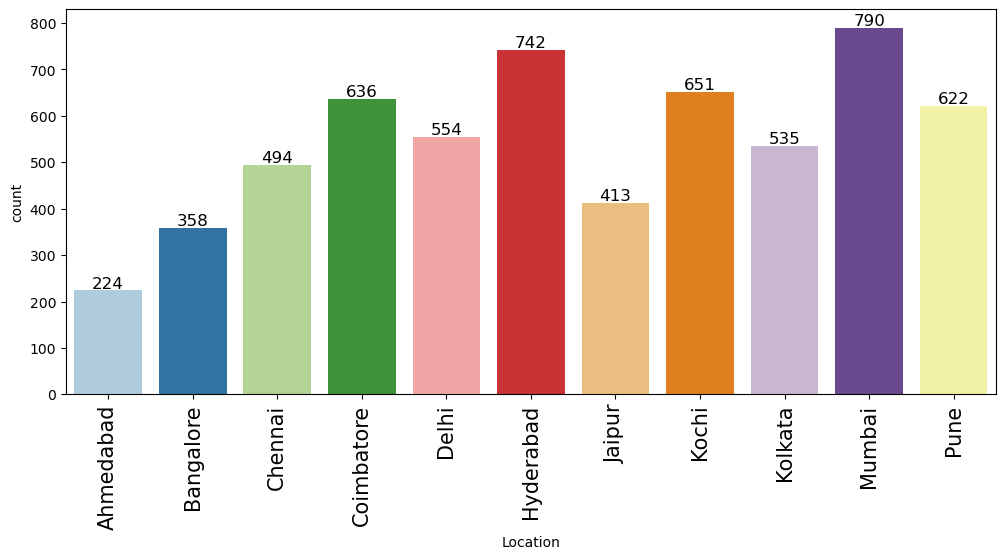

<IPython.core.display.Javascript object>

In [2256]:
# the number of cars available accross the different cities in which the cars are being sold or are
# available for purchase
labeled_barplot(CData2, "Location")

- *Ahmedabad is the city where less used cars are sold or are available with 224 cars*
- *In contrast, the top five of cities with the high volume of available used cars are Mumbai (790 cars), Hyderabad (742 cars), Kochi (651 cars), Coimbatore (636 cars) and Pune (622 cars)*

#### **Observation of Owner_Type**

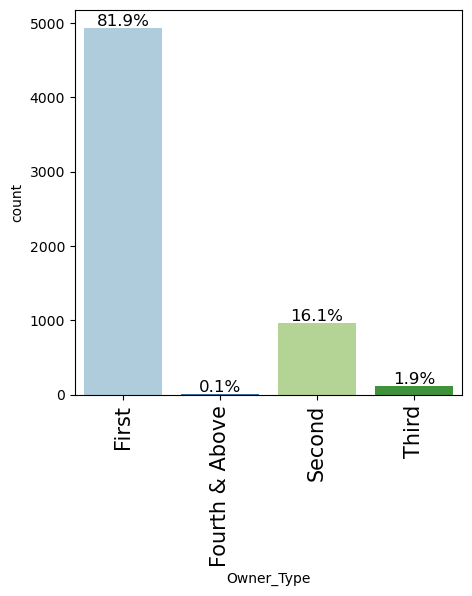

<IPython.core.display.Javascript object>

In [2257]:
labeled_barplot(CData2, "Owner_Type", perc=True)

- *the fact is that almost 82% of the used cars are owned by their first owners, those who bought on the new market*
- *only 18% of cars have been sold or bought on the pre-owned market (respectively 16% for Second owners type, 1.9% for third owner type. Fourth and above type of owners is marginal (0.1%)*

#### **Observation of Fuel_Type**

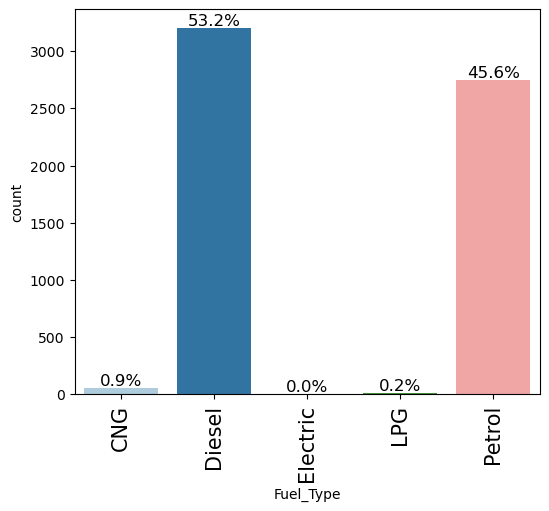

<IPython.core.display.Javascript object>

In [2258]:
labeled_barplot(CData2, "Fuel_Type", perc=True)

- *Diesel represent 53.2% of fuel type used, followed respectively by Petrol fuel (45.6%), CNG fuel (0.9%), LPG fuel (0.2%) and Electric fuel (slightly higher than 0.0%)*

- *Very few used cars use fuels other than Diesel and Petrol*
- *CNG is far behin while LPG and Electric are marginal*

#### **Observation of Transmission**

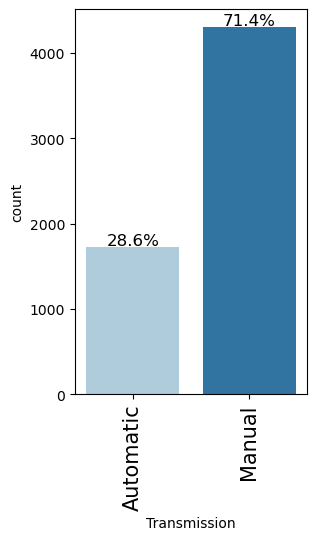

<IPython.core.display.Javascript object>

In [2259]:
labeled_barplot(CData2, "Transmission", perc=True)

*Almost 71.4% of uded cars available have a manual transmission whereas 28.6% of used cars have an automatic transmission*

#### **Observation of Years**

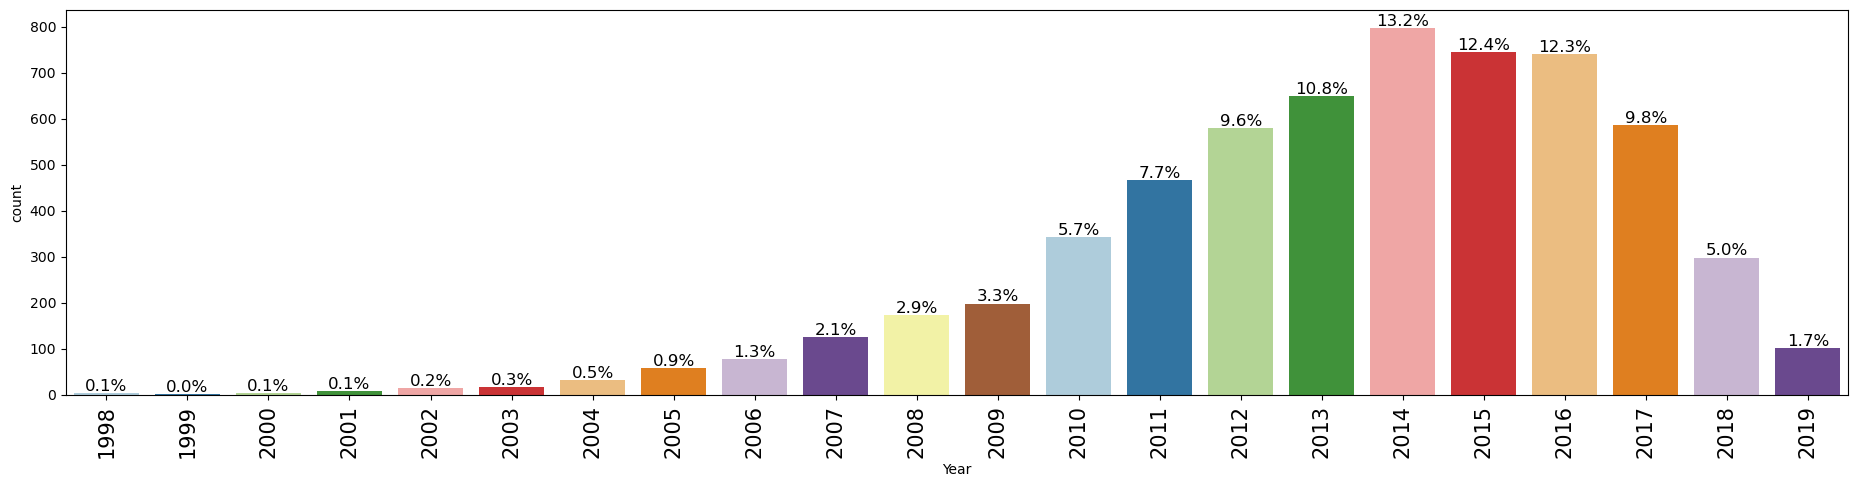

<IPython.core.display.Javascript object>

In [2260]:
labeled_barplot(CData2, "Year", perc=True)

* 2014 is the year with the highest manufactured cars (13.2% of the global production). Before the year 2006, the number of cars manufactured per year was less than 1% of the total car production

#### **Observation of car_brand_only**

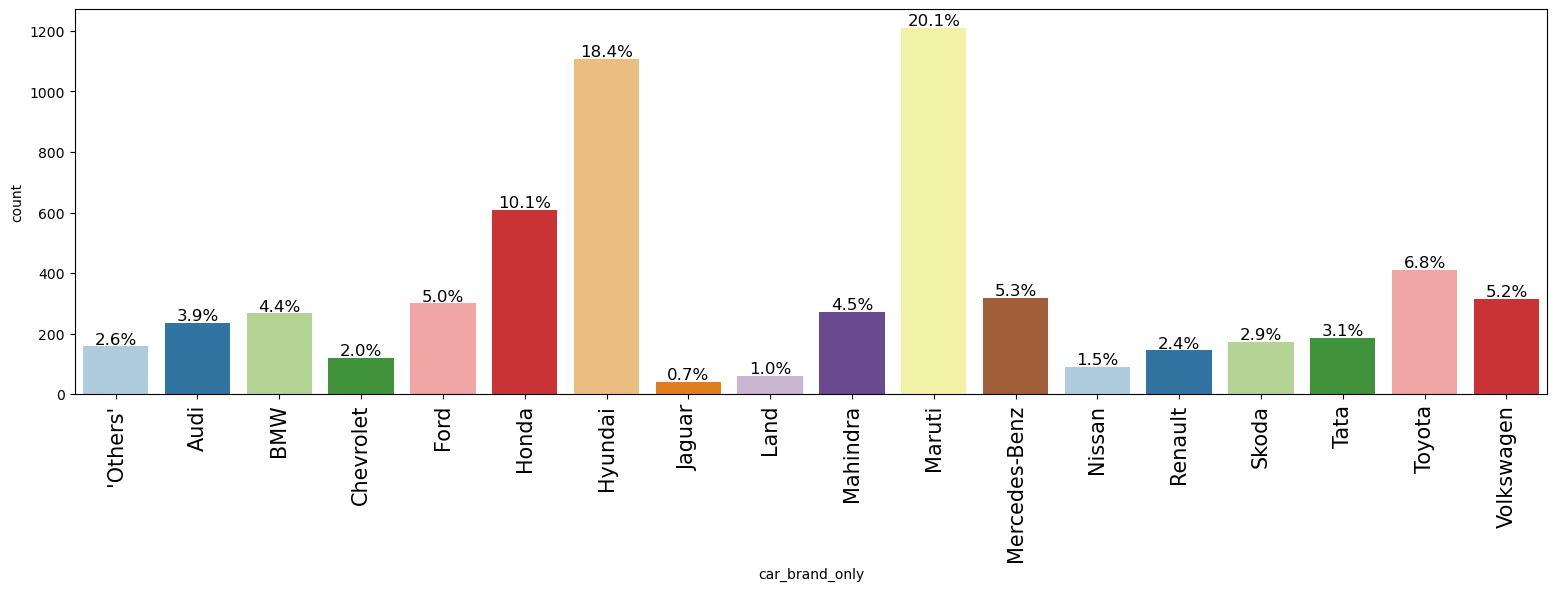

<IPython.core.display.Javascript object>

In [2261]:
labeled_barplot(CData2, "car_brand_only", perc=True)

* The car brand the most available are Maruti (20.1%) and Hyundai (18.4%) and the less available are Jaguar (0.7%) and Land (1%).

#### **Observation of old_car?**

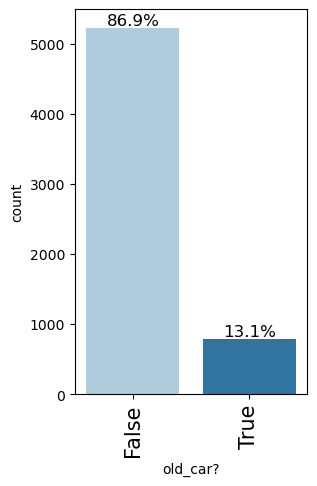

<IPython.core.display.Javascript object>

In [2262]:
labeled_barplot(CData2, "old_car?", perc=True)

#### **Observation of Mileage**

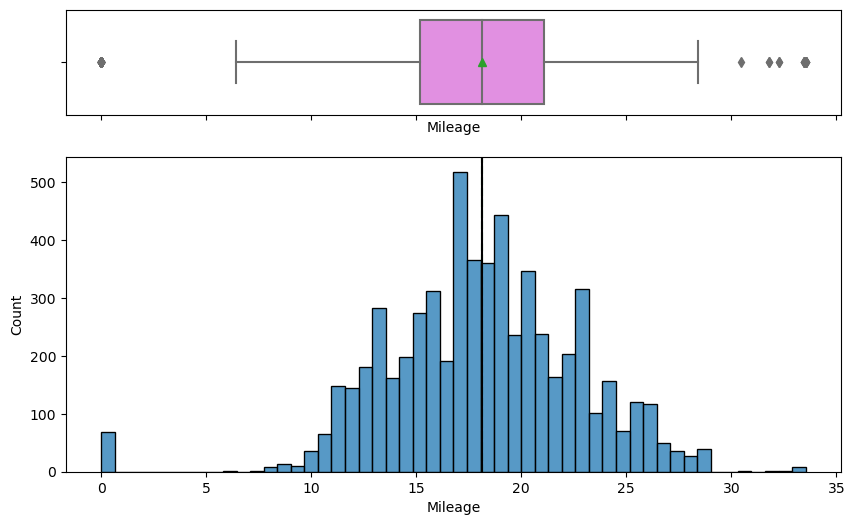

<IPython.core.display.Javascript object>

In [2263]:
histogram_boxplot(CData2, "Mileage")

- *The distribution of Mileage looks Normal Distributed. The median and the mean are identical and the skewness is quite non-existant*
- *There are some outliers in this variable*
- *From the boxplot, we can see that Q3 is around 21 km/kg which means 75% of cars mileage offered are below the 22 kmpl*

#### **Observation of Engine**

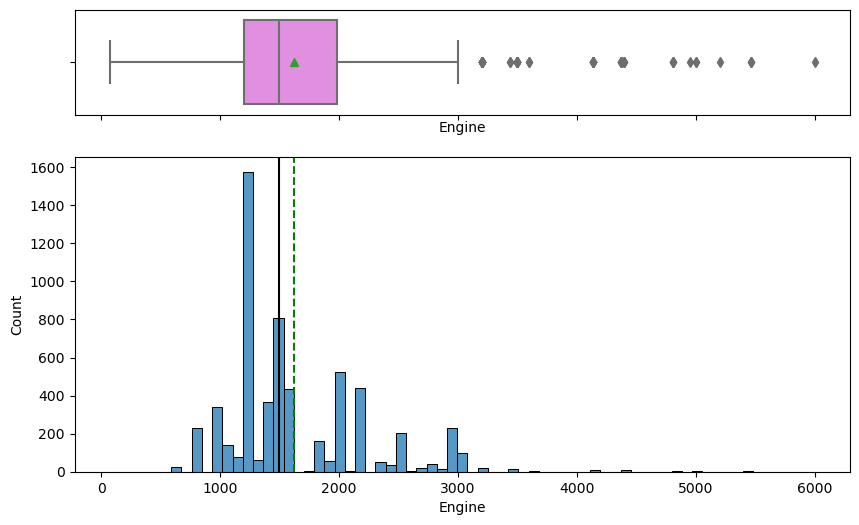

<IPython.core.display.Javascript object>

In [2264]:
histogram_boxplot(CData2, "Engine")

- *The distribution of Engine is right skewed.*
- *There are a priori some outliers in this variable*
- *From the boxplot, we can see that Q3 is around 2000 CC (75% of the displacement volume of the engine are below the 2000 CC)*

#### **Observation of Power**

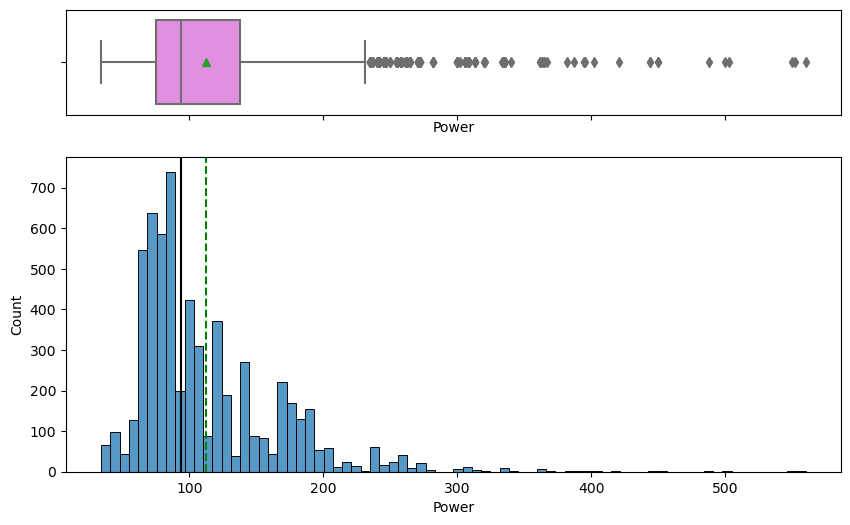

<IPython.core.display.Javascript object>

In [2265]:
histogram_boxplot(CData2, "Power")

- *The distribution of Power is very right skewed.*
- *There are a priori many outliers in this variable*
- *From the boxplot, we can see that Q3 is around 140 bhp (75% of cars have their maximum power below the 140 bhp)*

#### **Observation of Seats**

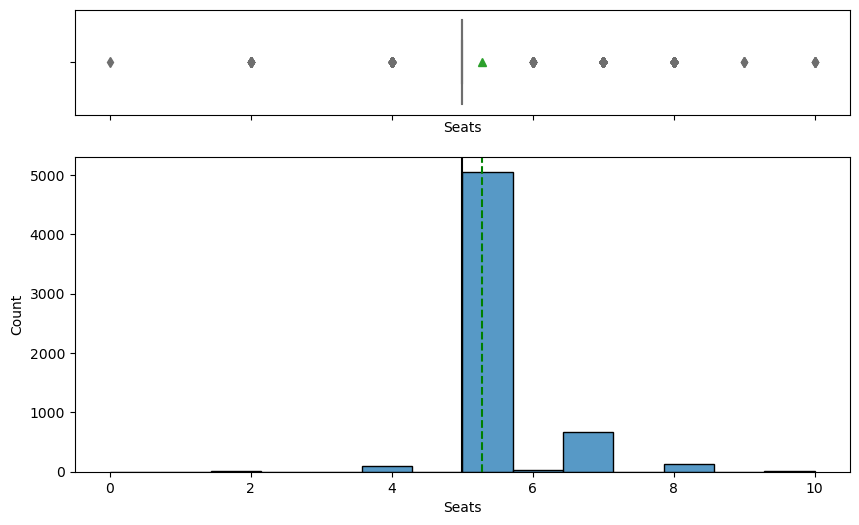

<IPython.core.display.Javascript object>

In [2266]:
histogram_boxplot(CData2, "Seats")

- *The distribution of seats is right skewed.*

#### **Observation of Kilometers Driven**

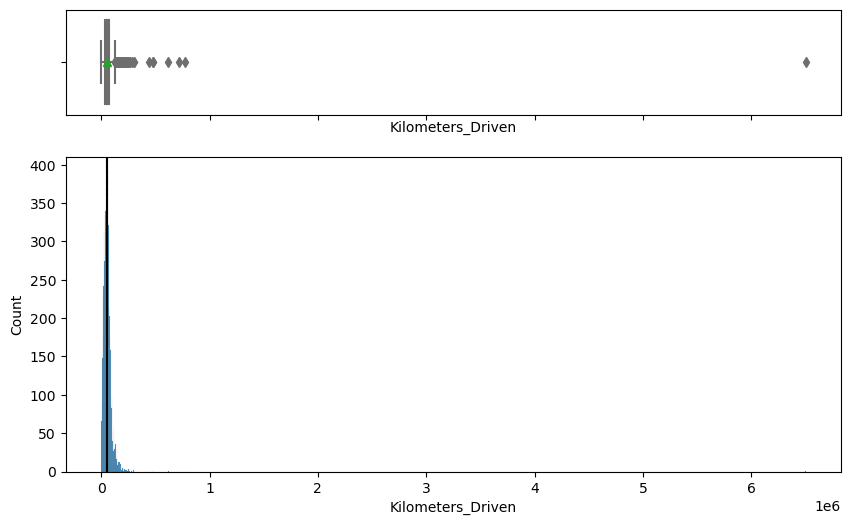

<IPython.core.display.Javascript object>

In [2267]:
histogram_boxplot(CData2, "Kilometers_Driven")

- *There is a right skeweness in the Kilometer_Driven variable.*
- *There are a priori outliers in this variable*
- *From the boxplot, we can see that Q3 is around 73000 kilometers (75% of cars have their maximum kilometers driven below 73000 km)*

#### **Observation of used_cars_age**

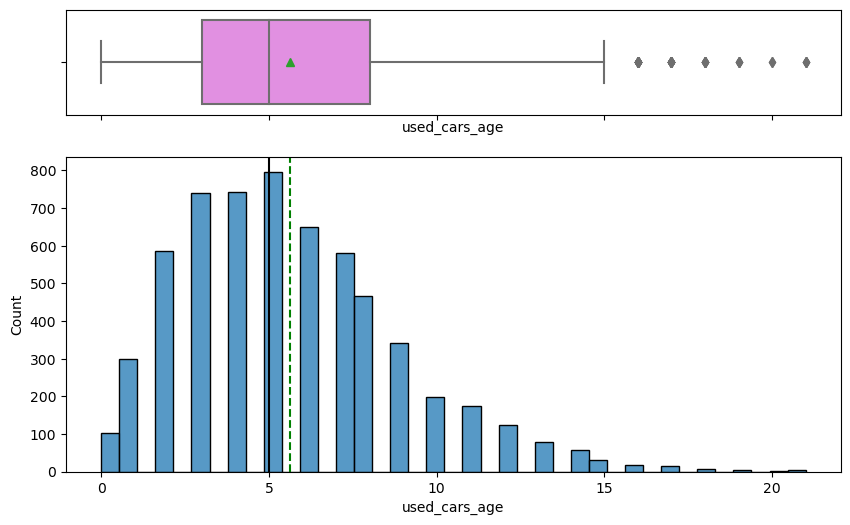

<IPython.core.display.Javascript object>

In [2268]:
histogram_boxplot(CData2, "used_cars_age")

*The `used_cars_age` column is right skewed*

#### **Observation of New Price**

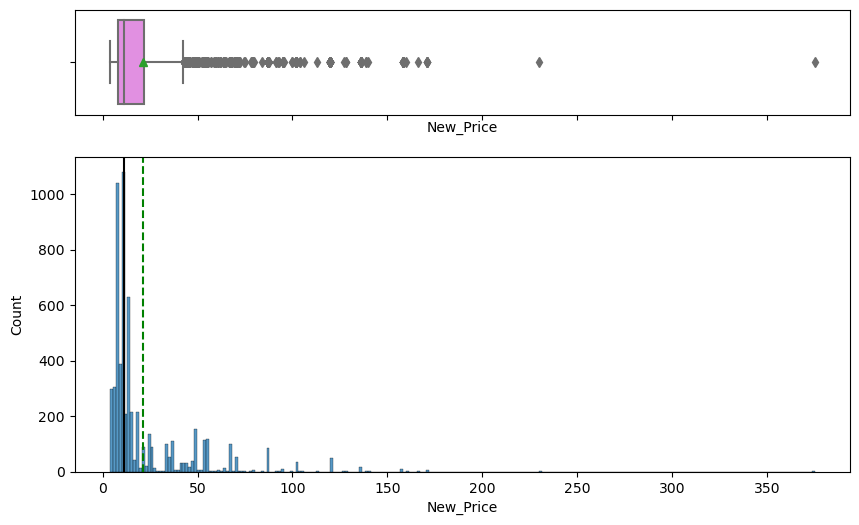

<IPython.core.display.Javascript object>

In [2269]:
histogram_boxplot(CData2, "New_Price")

- *There is a huge right skewed in the variable new price.*
- *There are a priori outliers in this variable*
- *From the boxplot, we can see that Q3 is around 22 INR Lakhs (75% of the cars have their maximum new price below 22 INR Lakhs)*

#### **Observation of Price**

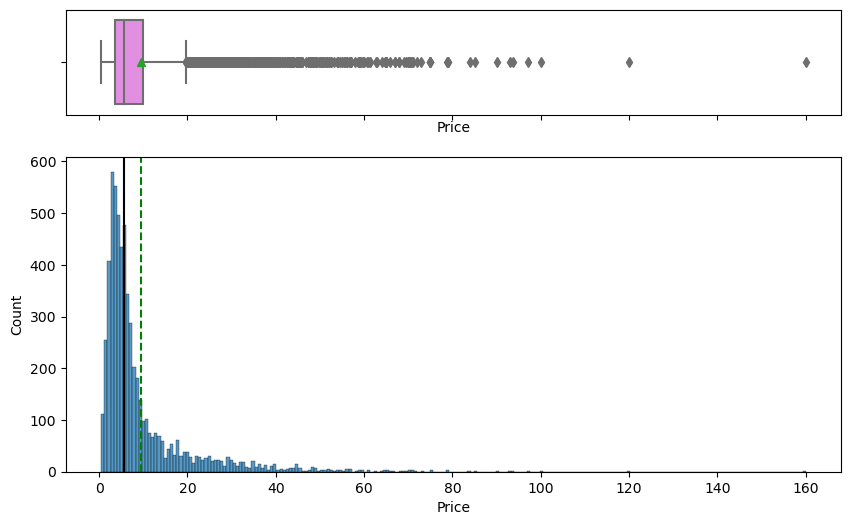

<IPython.core.display.Javascript object>

In [2270]:
histogram_boxplot(CData2, "Price")

- *There is a huge right skewed in the variable price.*
- *There are a priori outliers in this variable*
- *From the boxplot, we can see that Q3 is around 10 INR Lakhs (75% of the used cars have their maximum  price below 10 INR Lakhs)*

## Bivariate Analysis

#### **Correlations tab**

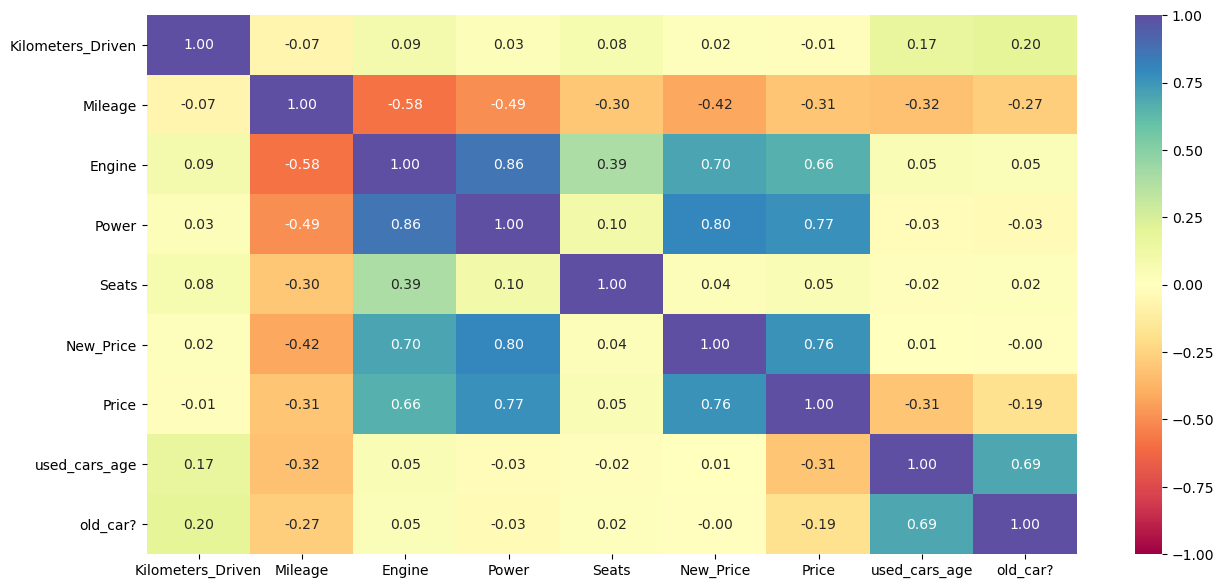

<IPython.core.display.Javascript object>

In [2271]:
plt.figure(figsize=(15, 7))
sns.heatmap(CData2.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- *There is a strong linear correlation between:*
 - *`Engine` and `Mileage` (-0.58)*,
 - *`Engine` and `Power` (0.86)*,
 - *`Engine` and `New_Price` (0.70)*,
 - *`Engine` and `Price` (0.66)*,
 - *`Power` and `New_Price` (0.80)*,
 - *`Power` and `Price` (0.77)*,
 - *`New_Price` and `Price` (0.76)*,
 - *`old_car?` and `used_cars_age` (0.69)*,
- *The correlations between other variables are either too low or not very important*

### Let's check the variation in `Price` with some of the categorical columns in our data

### `Location` vs `Price`

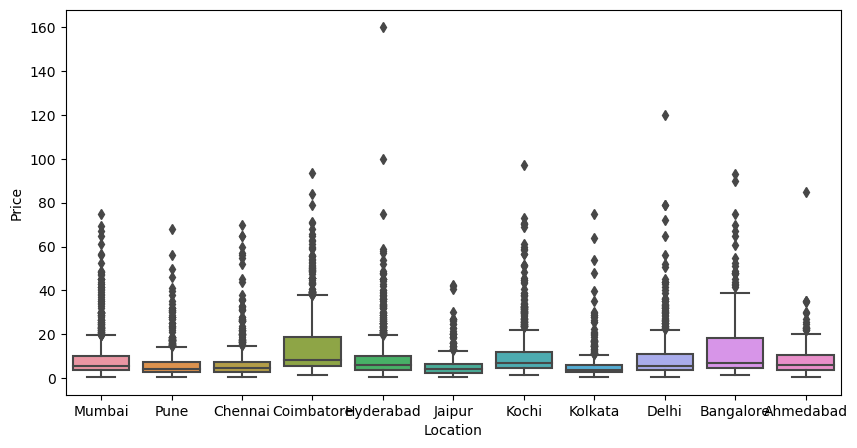

<IPython.core.display.Javascript object>

In [2272]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location", y="Price", data=CData2)
plt.show()

* Used cars available at Kolkata or Jaipur cities have a lower prices in general.

### `Year` vs `Price`

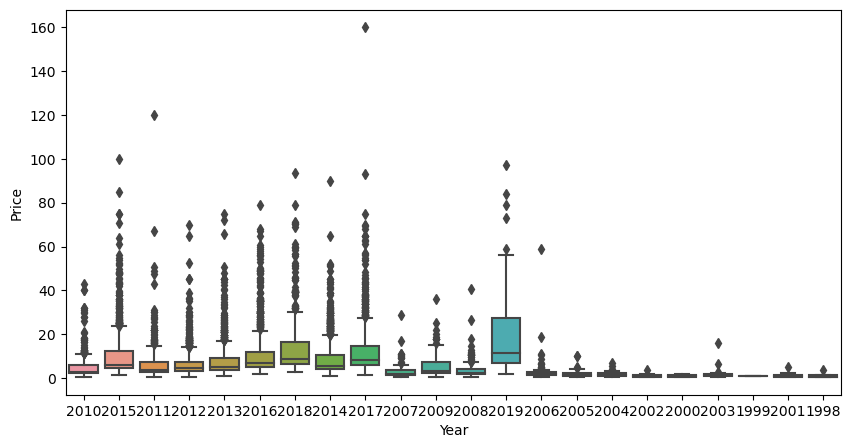

<IPython.core.display.Javascript object>

In [2273]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Year", y="Price", data=CData2)
plt.show()

* The `Price` were very low until 2006

### `Fuel_Type` vs `Price`

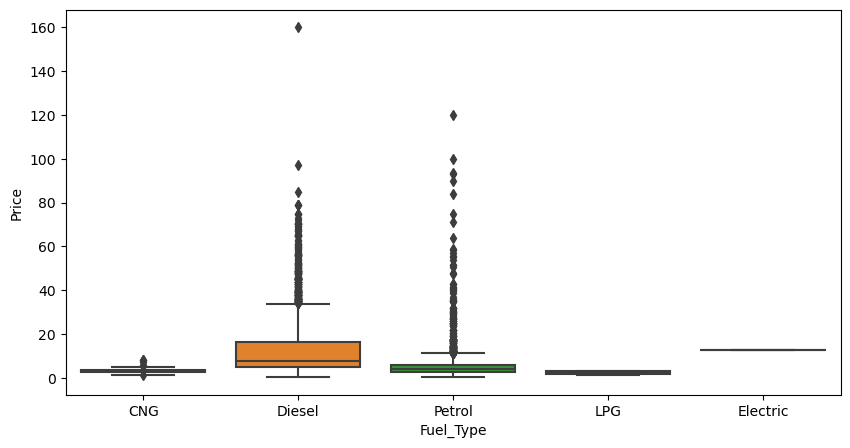

<IPython.core.display.Javascript object>

In [2274]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=CData2)
plt.show()

* Diesel fuel type is the most requested in India and it is the most expensive

### `Transmission` vs `Price`

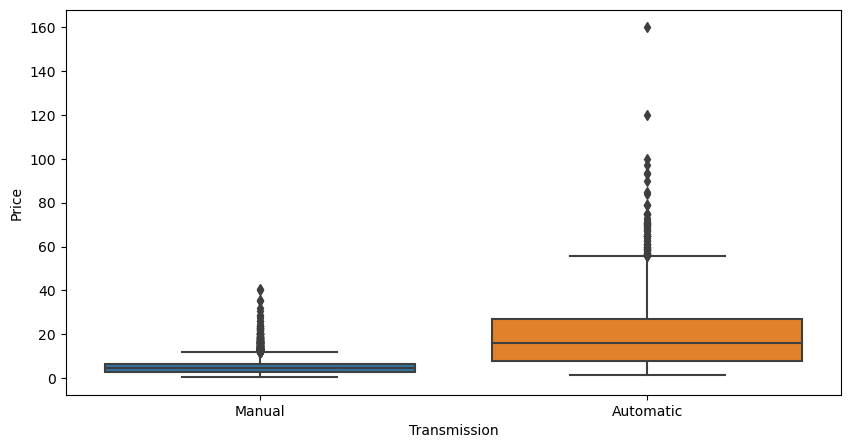

<IPython.core.display.Javascript object>

In [2275]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Transmission", y="Price", data=CData2)
plt.show()

* Automatic transmission is the most frequent type of transmission used by the cars and this transmission is the most expensive

### `Owner_Type` vs `Price`

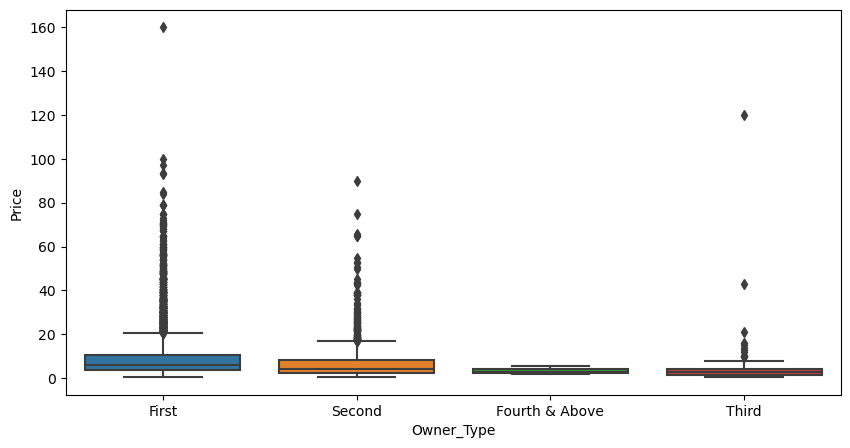

<IPython.core.display.Javascript object>

In [2276]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Owner_Type", y="Price", data=CData2)
plt.show()

The owners of first used cars have the most expensive cars, followed by second-type of owners

### `car_brand_only` vs `Price`

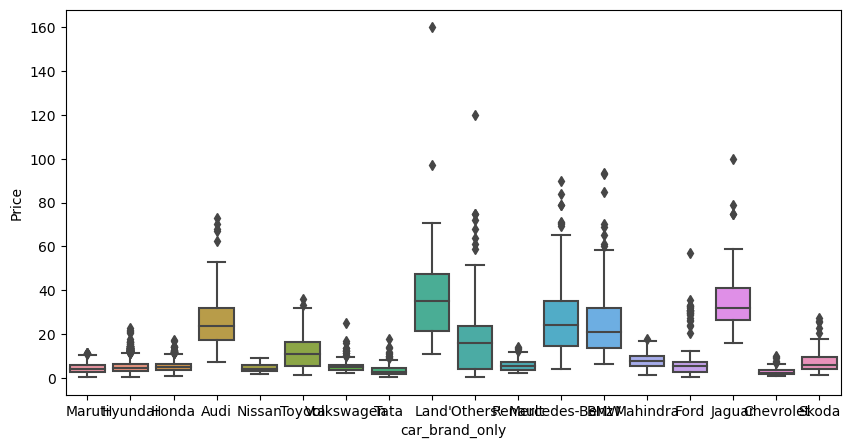

<IPython.core.display.Javascript object>

In [2277]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="car_brand_only", y="Price", data=CData2)
plt.show()

* Land brand is the most expensive car_brand in the pre-owned market in India

### `old_car?` vs `Price`

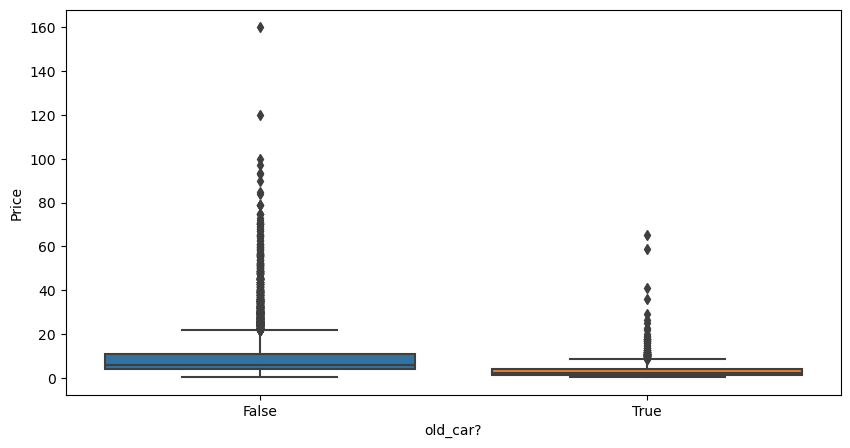

<IPython.core.display.Javascript object>

In [2278]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="old_car?", y="Price", data=CData2)
plt.show()

* Unsurprisingly, old used cars are less expensive than those that not old

### Pairplot

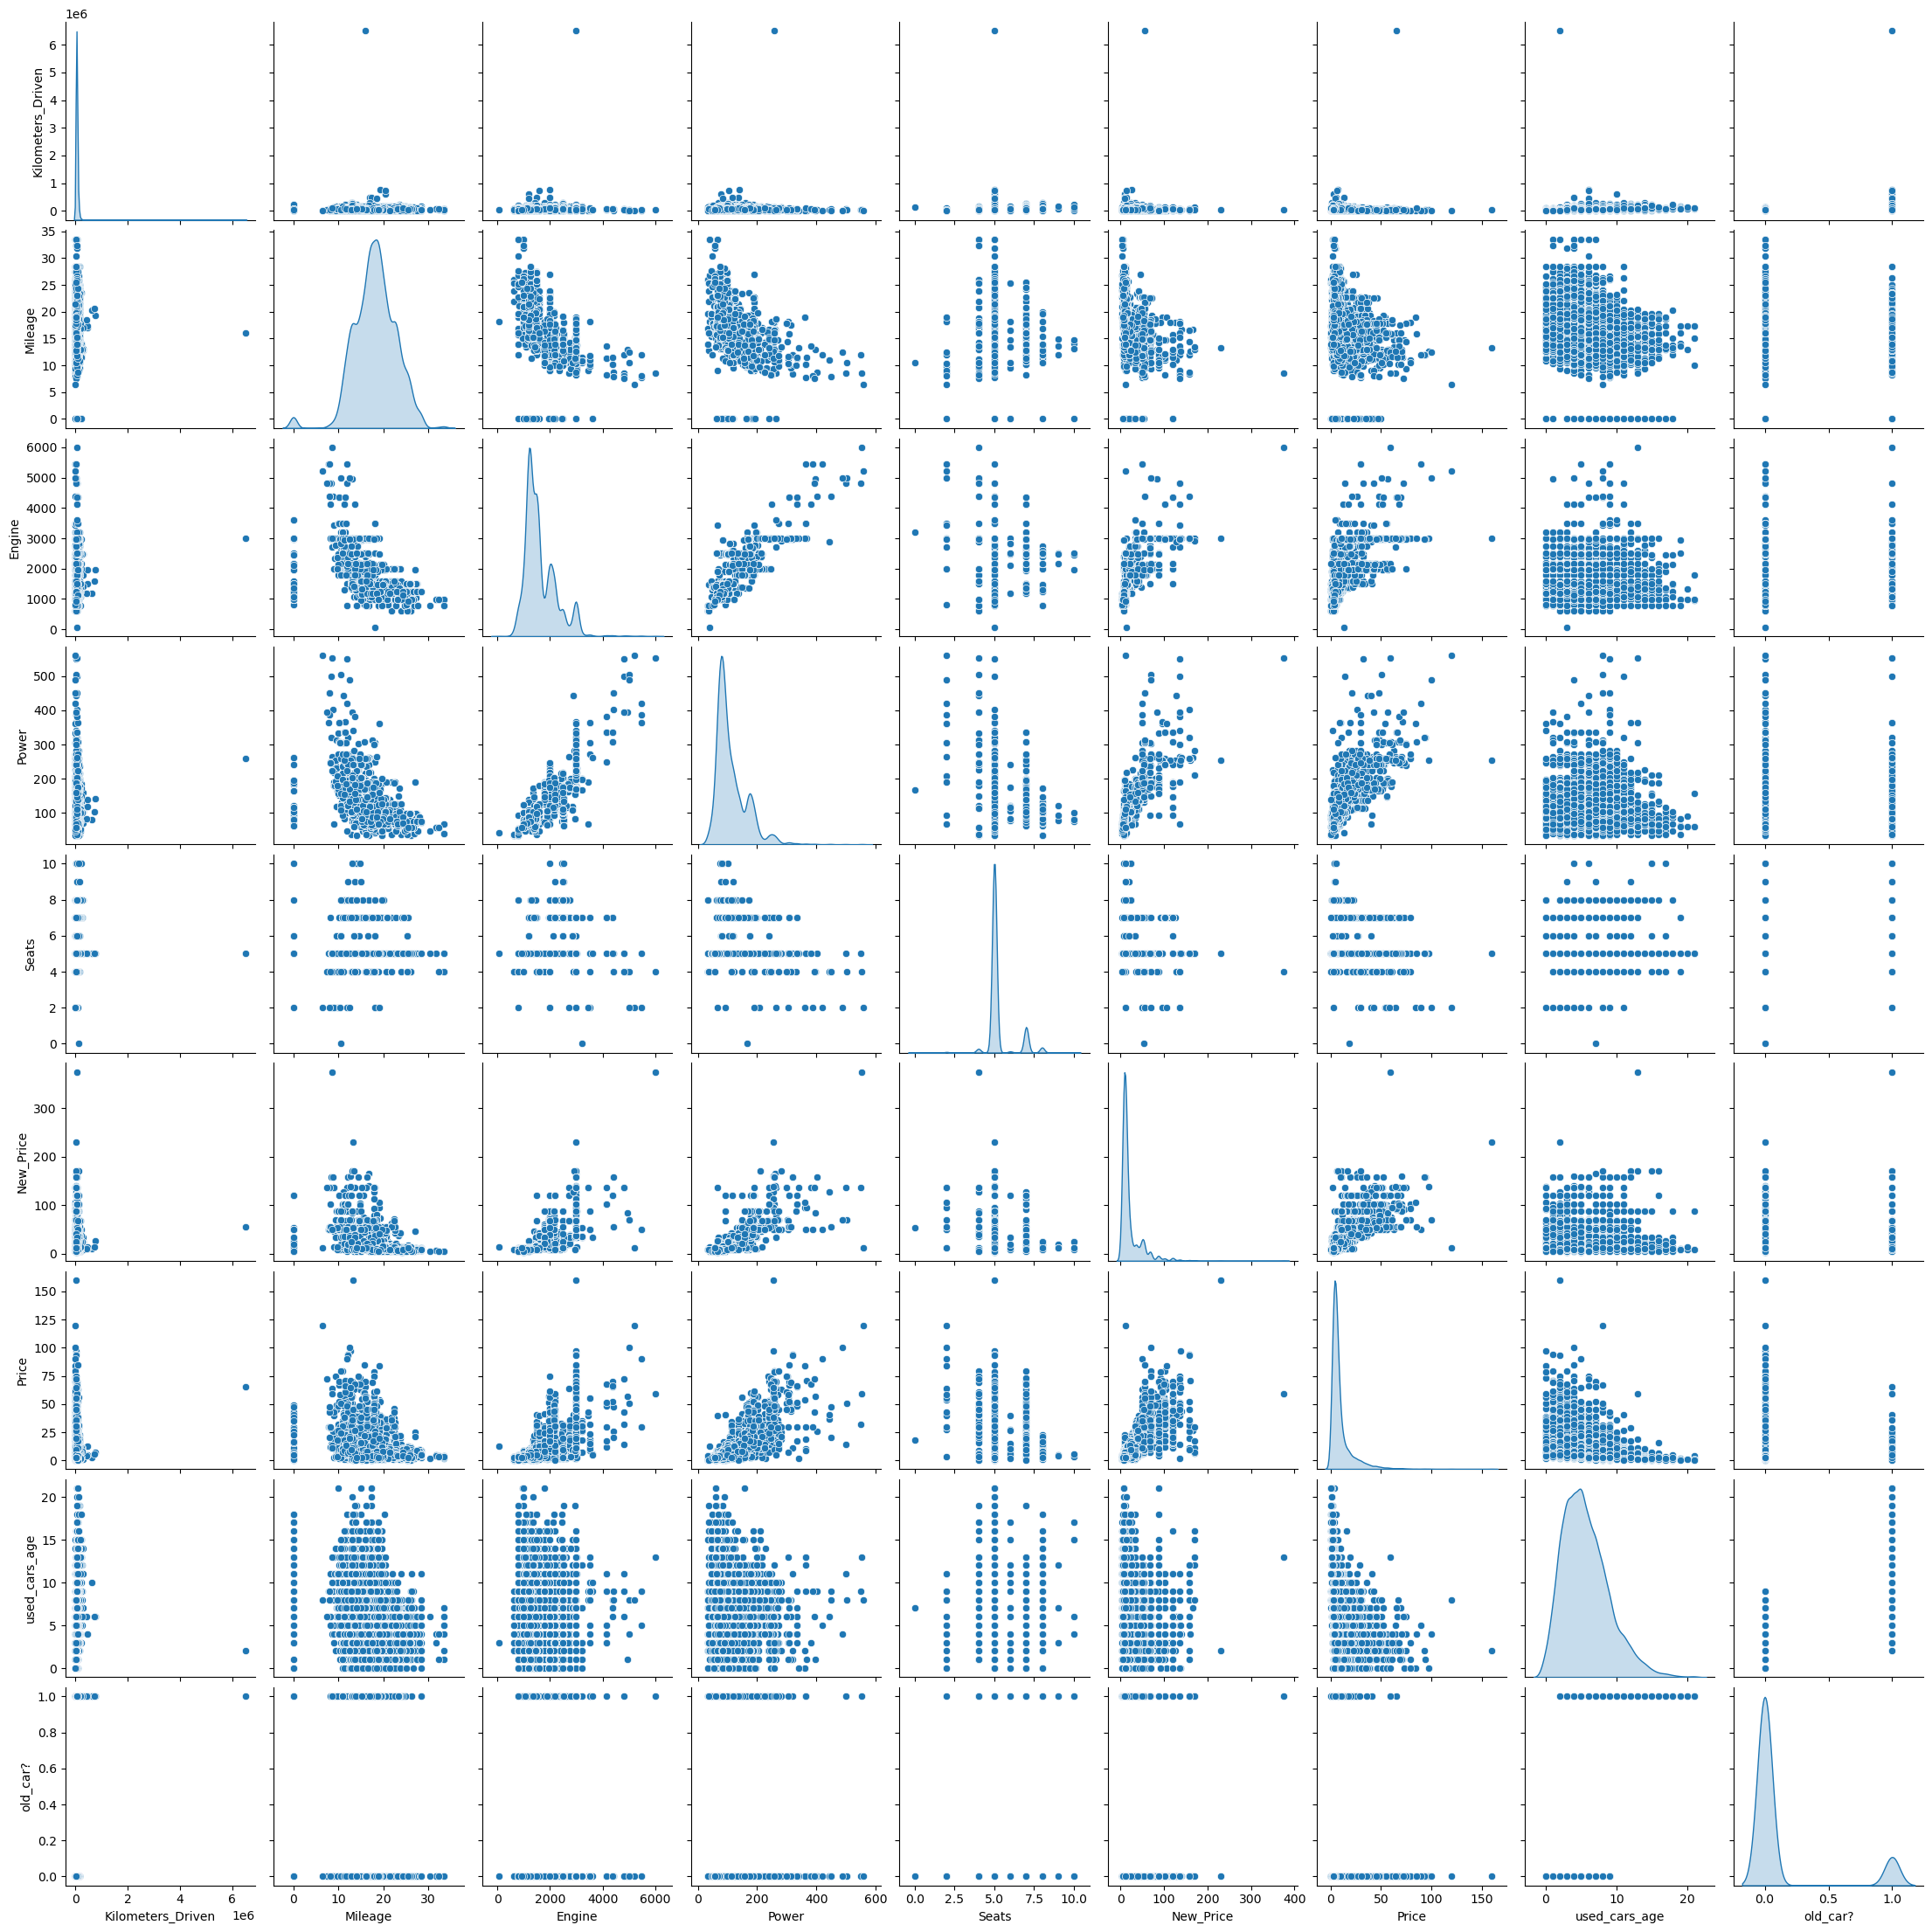

<IPython.core.display.Javascript object>

In [2279]:
sns.pairplot(
    CData2, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

* There is no correlation between `Kilometers_Driven` and `Price` but there is an outlier that we should replace by a central tendancy parameter (median or mean)
* There is a weak negative correlation between `Mileage` and `Price` but there are some outliers between 0 and 5 kmpl or km/kg
* There is a strong positive correlation between `Engine` and `Price` but there is an outlier which corresponds to the maximum of the used car price
* There is a strong positive correlation between `Power` and `Price` but there is an outlier which corresponds to the maximum of the used car price
* There is no correlation between `Power` and `Price` but there is an outlier which corresponds to the maximum of the used car price



- *The density plot of the column `Kilometers_Driven` shows that its distribution shape is very tightened and concentrate around a low value, with a right skewness*
- *The density plot of the column `Mileage` shows that its distribution shape looks normal distributed*
- *The density plot of the column `Engine` is a distribution curve with several descending picks. It shows a right skew*
- *The density plot of the column `Power` is a distribution curve with several descending picks. It shows a right skew*
- *The density plot of the column `Seats` shows a distribution shape which is tightened and centered aroung 5 with a right skew*
- *The density plot of the column `New_Price` shows that its distribution shape is very tightened and right skewned*
- *The density plot of the column `Price` shows that its distribution shape is very tightened and right skewned*
- *The density plot of the column `used_cars_age` shows that its distribution shape is right skewed*

#### Location and Kilometers_Driven

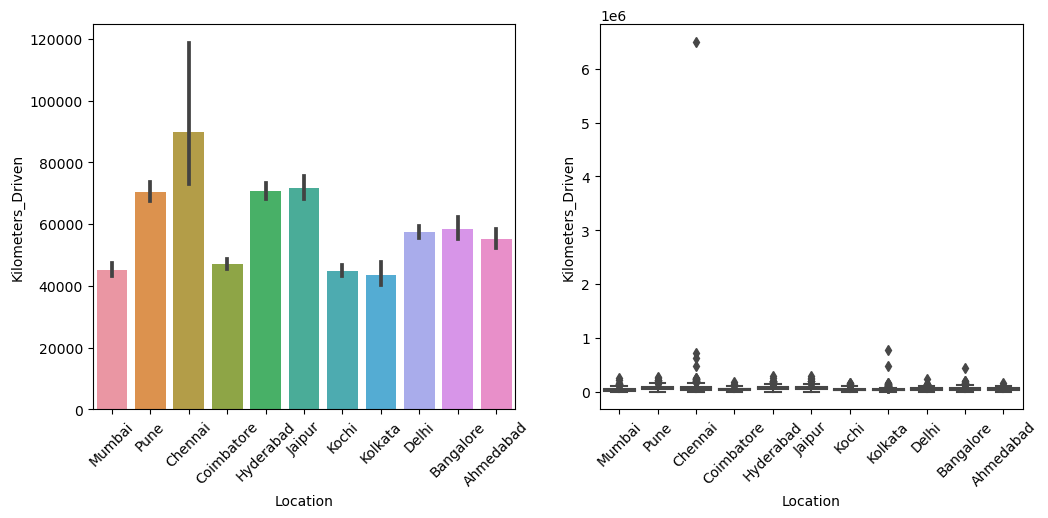

<IPython.core.display.Javascript object>

In [2280]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=CData2, y="Kilometers_Driven", x="Location")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=CData2, y="Kilometers_Driven", x="Location")
plt.xticks(rotation=45)

plt.show()

*The city of Chennai is the location in which the available or sold used cars have the highest average kilometers driven by the previous owners. This location and Kolkata are the cities with the highest total kilometers driven*

#### **Location vs Mileage**

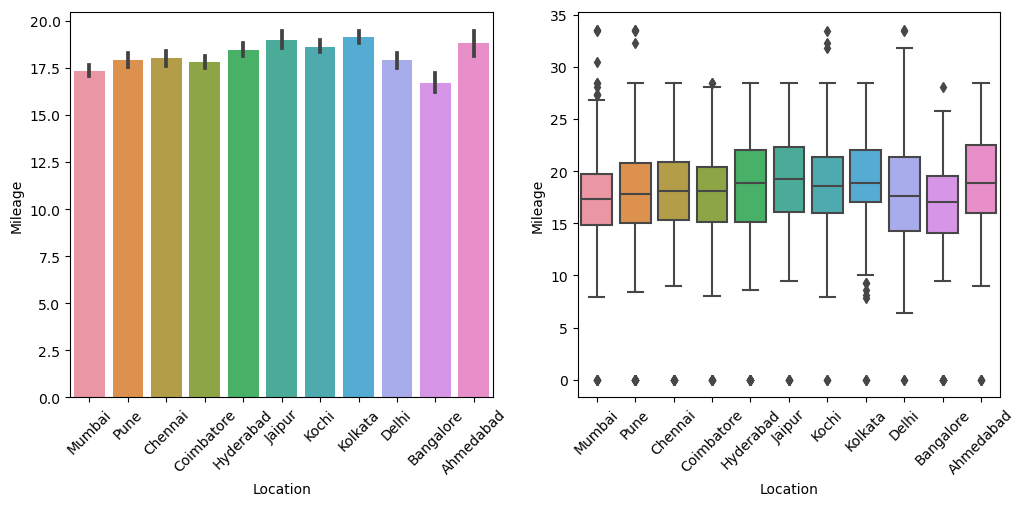

<IPython.core.display.Javascript object>

In [2281]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=CData2, y="Mileage", x="Location")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=CData2, y="Mileage", x="Location")
plt.xticks(rotation=45)

plt.show()

- *Mumbai, Delhi and Bangalore are the cities the standard average of mileage offered is the lowest*
- *Jaipur and Hyderabad are the cities with the highest standard of average mileage offered*

## Multivariate analysis

#### **Location vs Seats and Fuel type**

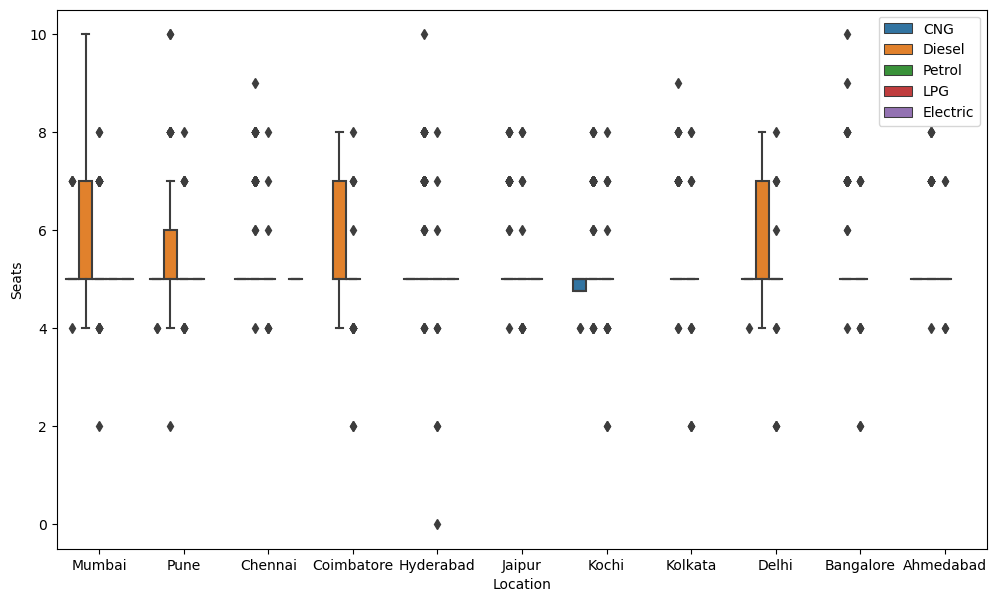

<IPython.core.display.Javascript object>

In [2282]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Location"], CData2["Seats"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

*The used cars with Diesel fuel have the most number of seats on the pre-owned market at Coimbatore, Delhi and Mumbai.*

#### **Location vs used_cars_age and Fuel type**

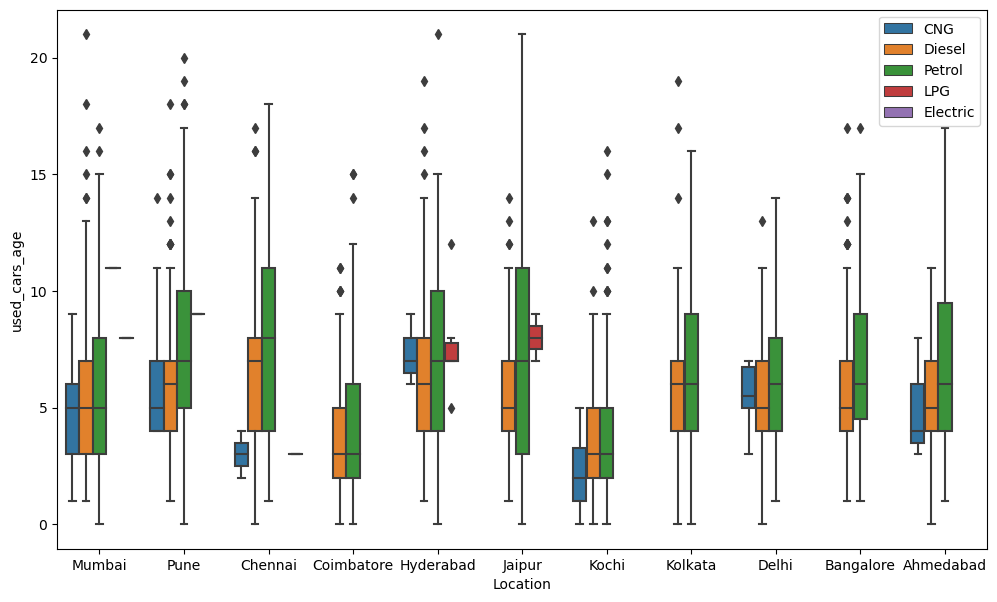

<IPython.core.display.Javascript object>

In [2283]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Location"], CData2["used_cars_age"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The oldest (highest range of age) used cars on the pre-owned market use Petrol fuel and are available at Jaipur, Chennai, Hyderabad and Ahmedabad.*
- *The used cars using Diesel fuel are less old. Nevertheless, the oldest one are in Chennai and Hyderabad*
- *Kochi city proposes less old used cars with Diesel, Petrol and CNG fuel. Cars4U might do good deals on cars bought in Kochi*

#### **Transmission vs Kilometers_Driven and Fuel type**

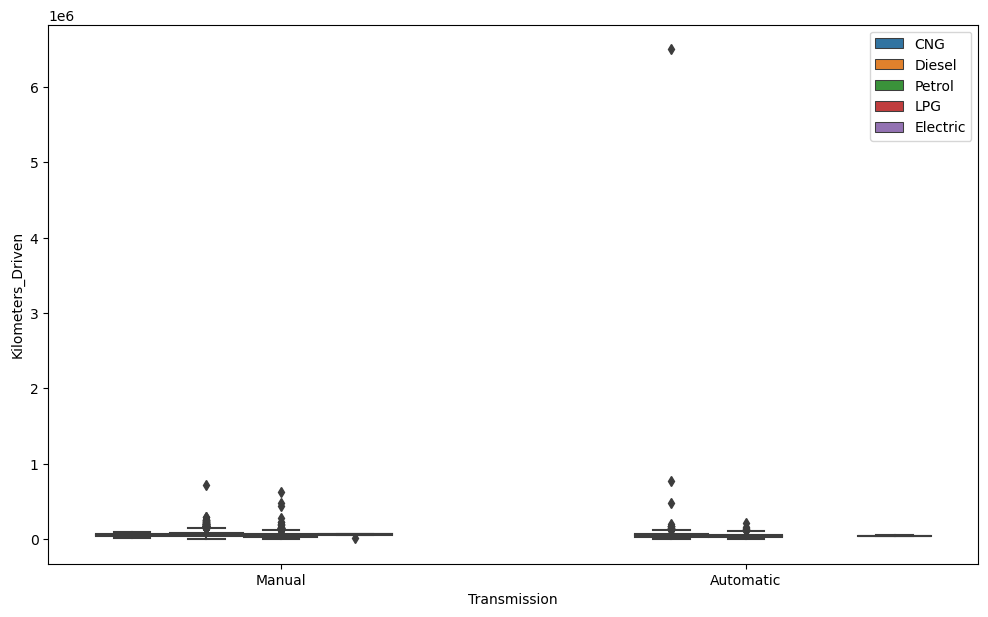

<IPython.core.display.Javascript object>

In [2284]:
plt.figure(figsize=(12, 7))
sns.boxplot(
    CData2["Transmission"], CData2["Kilometers_Driven"], hue=CData2["Fuel_Type"]
)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The number of kilometers driven by previous owners of used cars are almost the same both on manual ans automatic transmission mode, whatever the type of fuel used*

#### **Transmission vs Mileage and Fuel type**

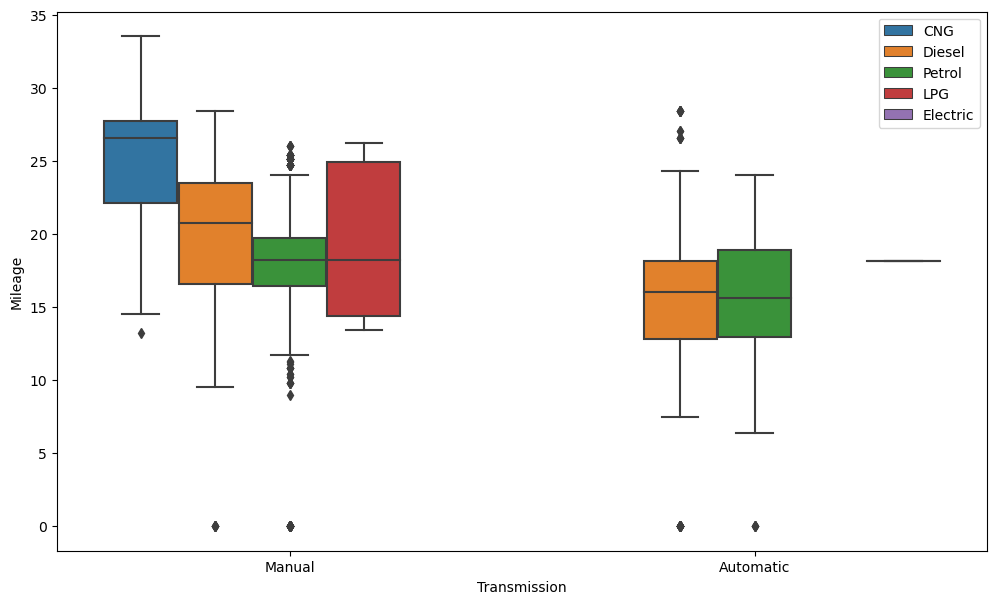

<IPython.core.display.Javascript object>

In [2285]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["Mileage"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The standard Mileage offered by the car company is most important with Manual cars that use CNG fuel type. They are followed by Manual cars which use Diesel, LPG and Petrol fuel type*

- *The standard Mileage offered for Automatic cars is very low and it is applied just for cars that use Diesel, Petrol and LPG fuel type*

- *Used cars that use Electric type of fuel are not affected by the Mileage offer*

#### **Transmission vs Engine and Fuel type**

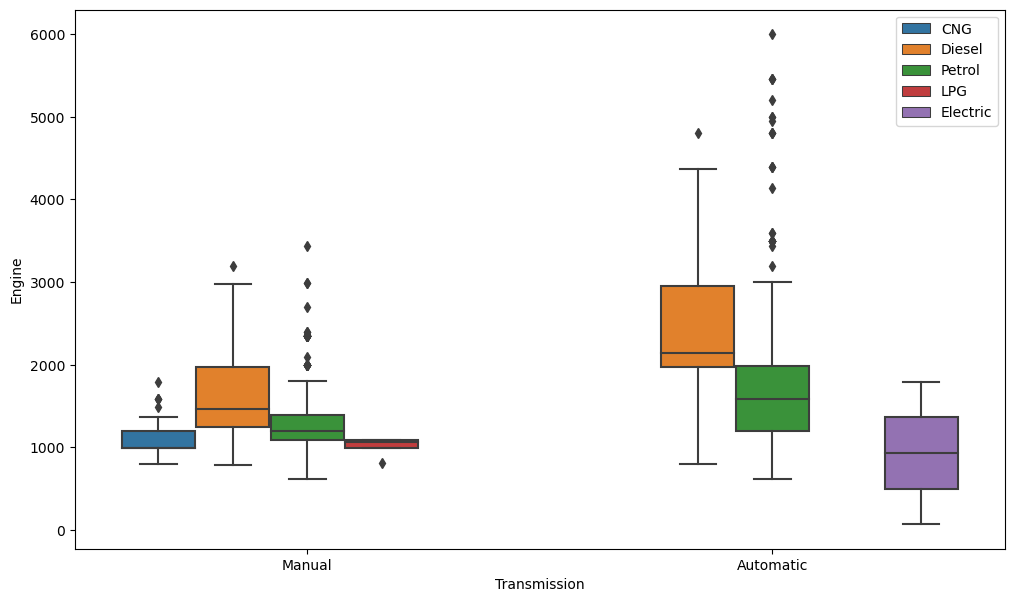

<IPython.core.display.Javascript object>

In [2286]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["Engine"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The displacement volume of Engine is most important with Automatic cars that use Diesel fuel type. They are followed by Automatic cars which use Petrol and Electric fuel type*

- *The displacement volume of Engine for Manual cars is considerably lower when it comes to Diesel and Petrol fuel. But this displacement volume exist for used cars that use CNG and LPG fuel type*

#### **Transmission vs Power and Fuel type**

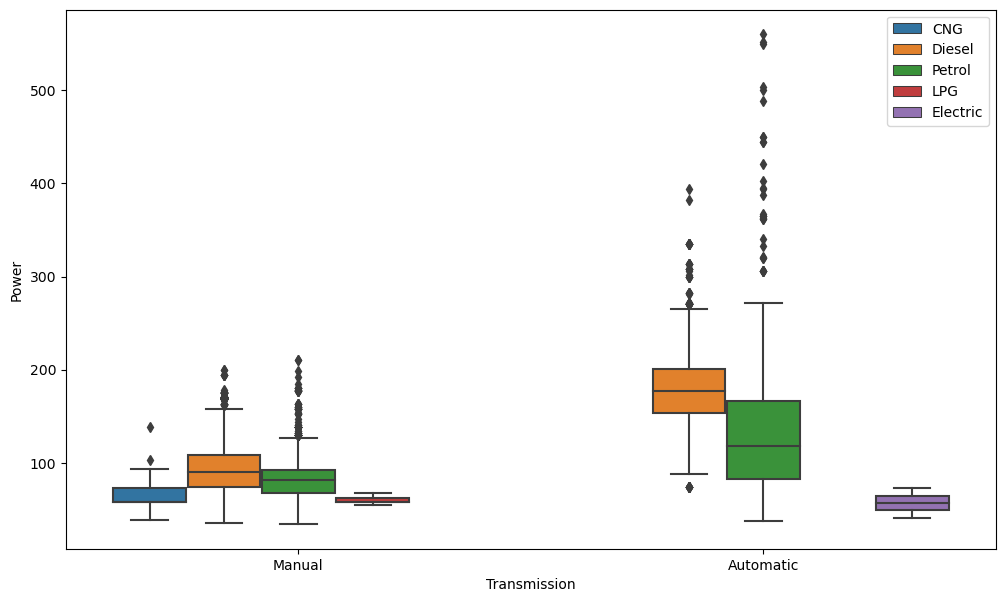

<IPython.core.display.Javascript object>

In [2287]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["Power"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The maximum power of Engine is most important with Automatic cars that use Diesel fuel type. They are followed by Automatic cars which use Petrol and Electric fuel type*

- *The maximum power of Engine for Manual cars is lower when it comes to Diesel and Petrol fuel. But It exists for used cars that use CNG and LPG fuel type*

#### **Transmission vs Seats and Fuel type**

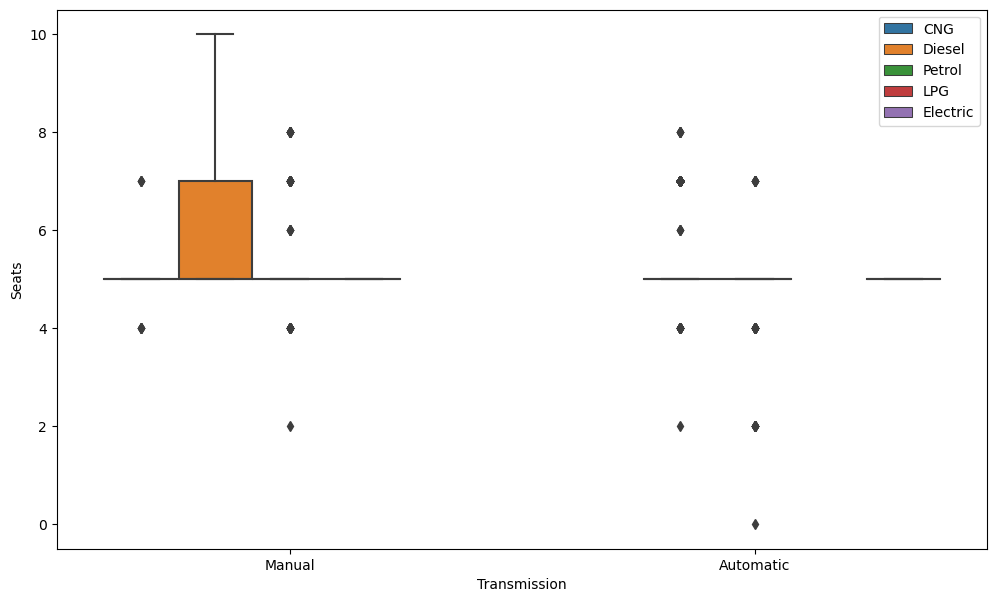

<IPython.core.display.Javascript object>

In [2288]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["Seats"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The number of seats in manual transmission used cars is at least 4 for those using Diesel fuel type. In automatic transmission used cars, this number of seats is between 0 and 7* 

- *The number of seats in manual transmission used cars is between 2 to 8 4 for those using Petrol fuel type.* **In automatic transmission used cars, there is not Petrol fuel type**

- *Some manual transmission used cars use CNG fuel type and the number of seats of those cars is between 4 and 7. In automatic transmission used cars, this number of seats is between  2 and 8*

- **Used cars which use Electric fuel type don't have seats**

#### **Transmission vs New_Price and Fuel type**

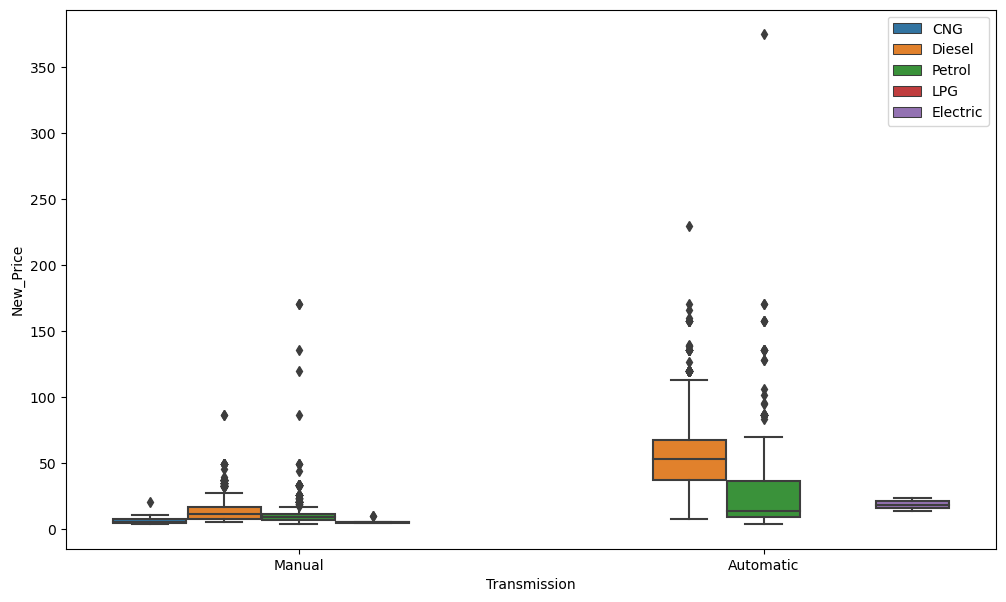

<IPython.core.display.Javascript object>

In [2289]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["New_Price"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *On the new car market, the median price of used cars with manual transmission are not to much different, whatever the fuel type used* 

- *On the new car market, the median price of used cars with automatic transmission are very different. Cars using Diesel fuel is the most epensive, followed by Petrol and then Electric fuel type*

#### **Transmission vs Price and Fuel type**

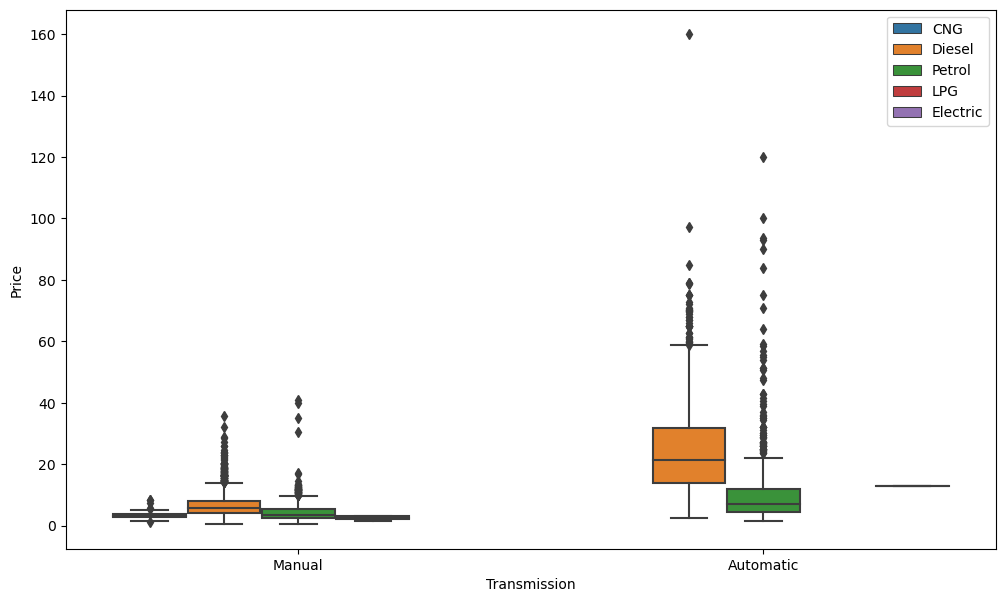

<IPython.core.display.Javascript object>

In [2290]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["Price"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The same trend is observed on the used cars price:*
 - *On the pre-owned car market, the median price of used cars with manual transmission are not to much different, whatever the fuel type used* 

 - *On the pre-owned car market, the median price of used cars with automatic transmission are very different. Cars using Diesel fuel is the most epensive, followed by Petrol and then Electric fuel type*

#### **Transmission vs used_cars_age and Fuel type**

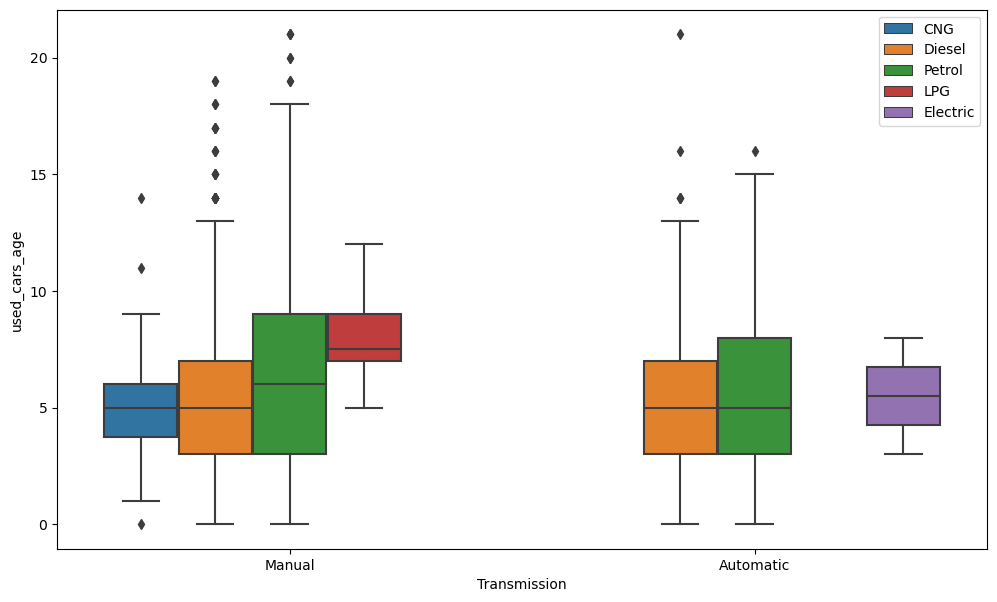

<IPython.core.display.Javascript object>

In [2291]:
plt.figure(figsize=(12, 7))
sns.boxplot(CData2["Transmission"], CData2["used_cars_age"], hue=CData2["Fuel_Type"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- *The used cars with Manual transmission using LPG fuel type have the highest median age, followed respectively by the used cars using Petrol. Those using Diesel and CNG have the same median level of age*

- *The used cars with Automatic transmission using Electric fuel type have the highest median age. Those using Petrol and Diesel have the same median level of age*

- *There is no used cars using CNG and LPG fuel type on Automatic transmission*

  ### **Numerical variables**
    - How the chosen numerical variable variates with `Price` variable

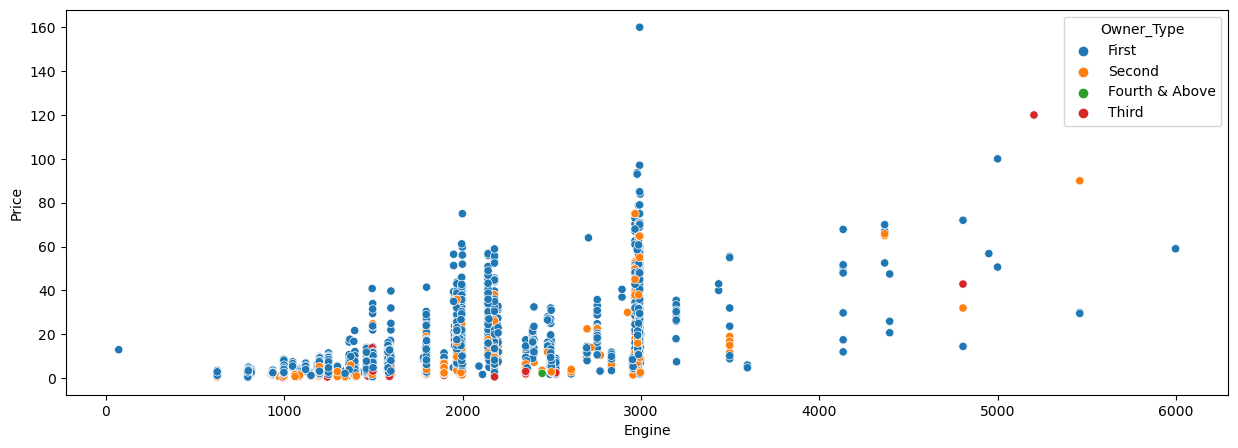

<IPython.core.display.Javascript object>

In [2292]:
# Scatter plot between Engine and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Engine"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

- *The scatterplot shows us, as on the correlation heatmap the existence of positive linear correlation between the Price and the Engine*

- *The used car with Engine = 3000 and price = 160 seems to be an outlier. But we will keep it as we want the model to handle hight price values*

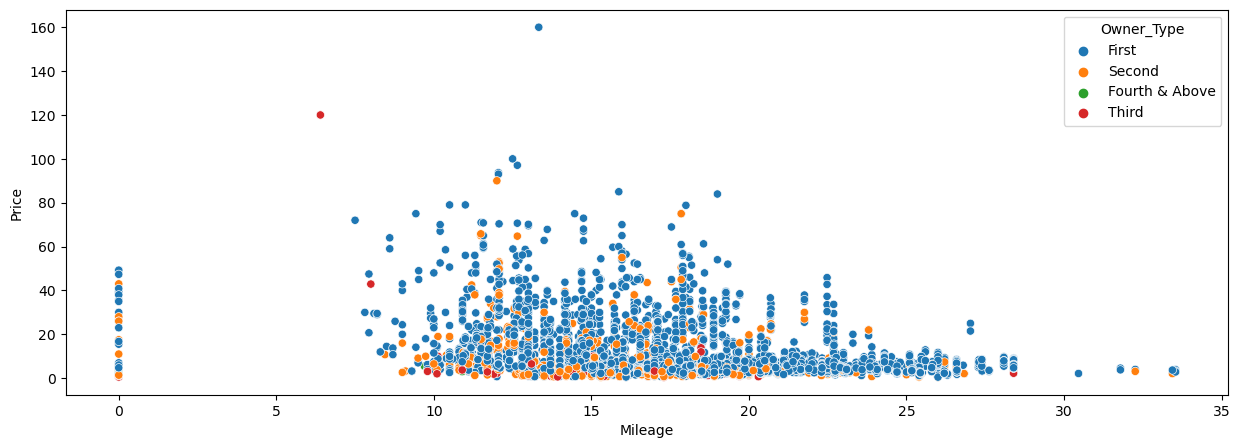

<IPython.core.display.Javascript object>

In [2293]:
# Scatter plot between Mileage and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Mileage"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

* Few cars used by first and second owners type have a very weak `Mileage` level, close to 0. And their sale `Price` is low compared to those with high level of Mileage. As it's difficult to explain this level of `Price` compared to the level of `Mileage`, those cars should be considered as **outliers**

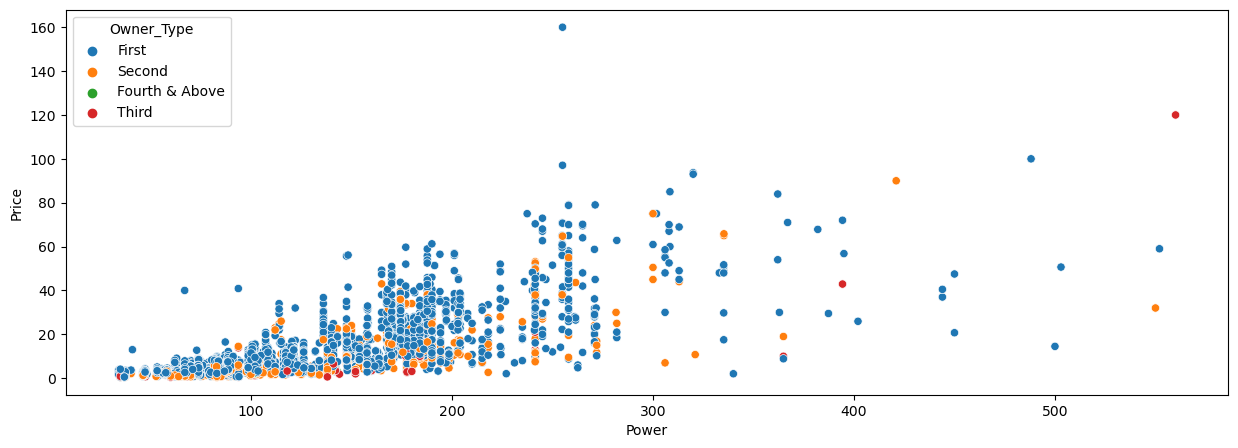

<IPython.core.display.Javascript object>

In [2294]:
# Scatter plot between Power and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Power"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

- *Strong positive correlation between Price and Power of used cars on the pre-owned market, whatever the type of owner*

- *The use car with a power at almost 250 with the price at 160 seems to be an outlier*

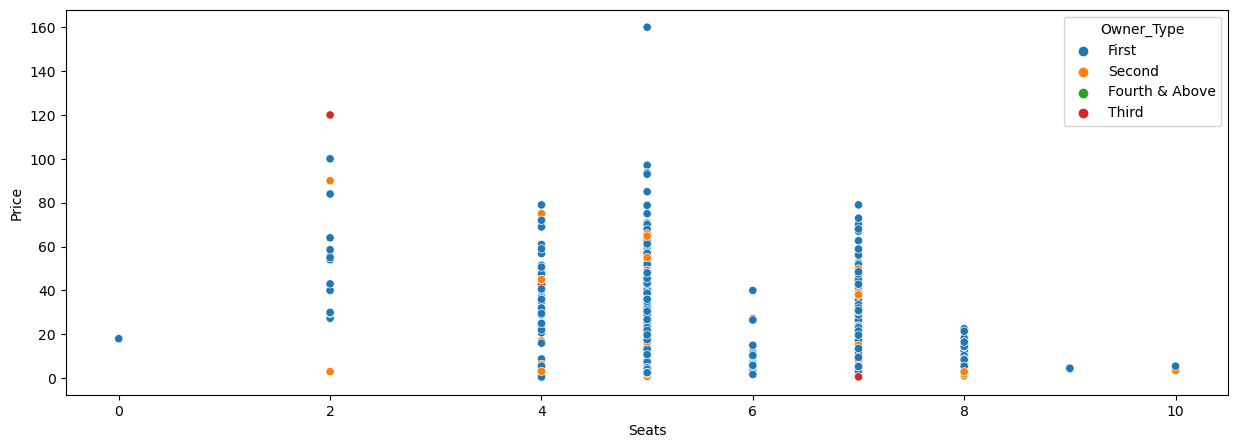

<IPython.core.display.Javascript object>

In [2295]:
# Scatter plot between Seats and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Seats"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

- *No correlation between the variables*

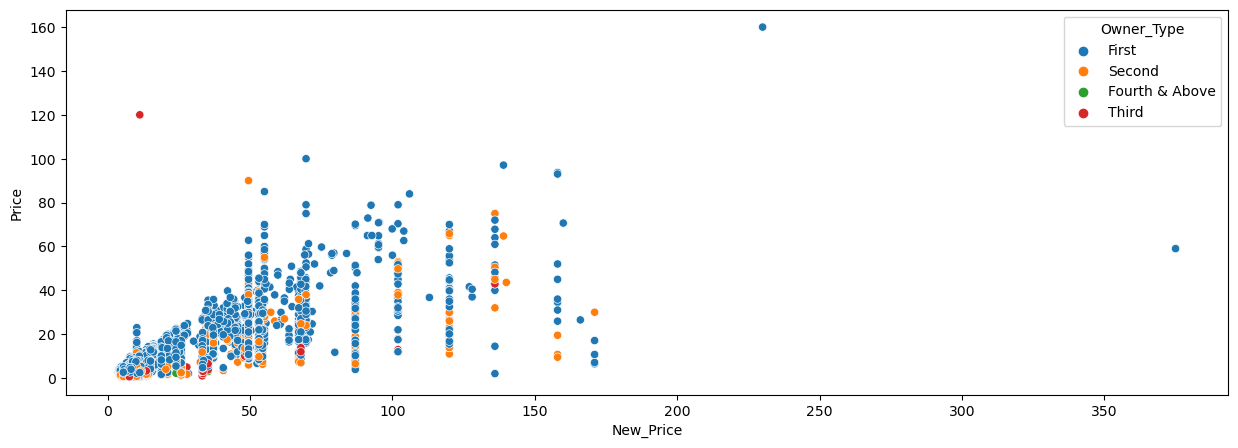

<IPython.core.display.Javascript object>

In [2296]:
# Scatter plot between New_Price and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["New_Price"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

- *Strong positive correlation between Price and New_Price of used cars, whatever the type of owner*

- *The used car with the new_price between 200 and 250 with the price at 160 seems to be an outlier*

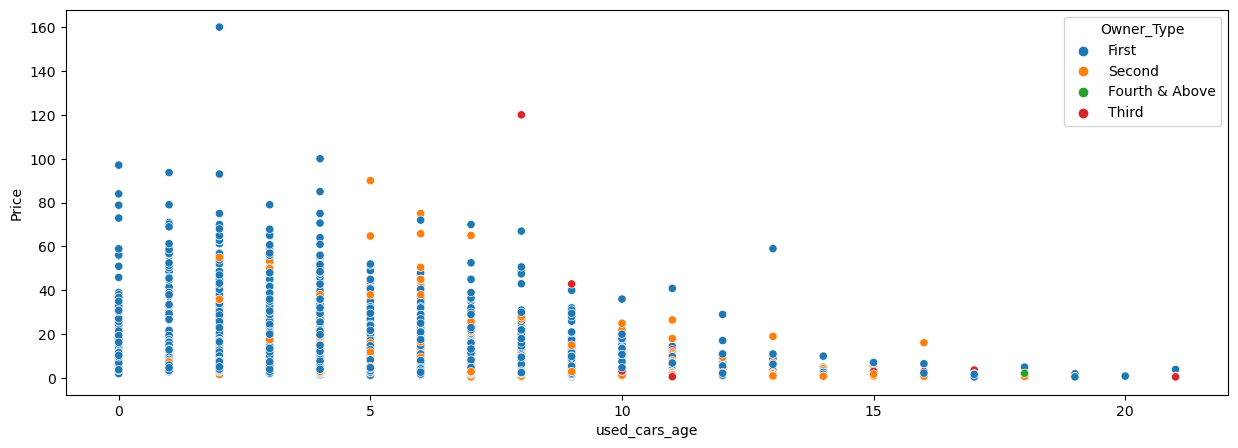

<IPython.core.display.Javascript object>

In [2297]:
# Scatter plot between used_cars_age and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["used_cars_age"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

- *No obvious correlation between the variables bu it seems the price of the used cars decrease as their age range is big*

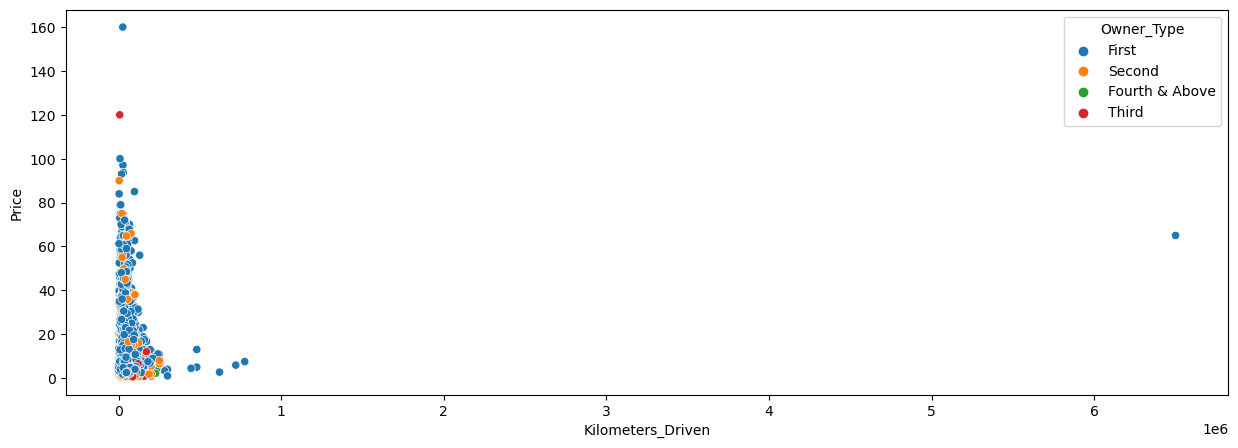

<IPython.core.display.Javascript object>

In [2298]:
# Scatter plot between Kilometers_Driven and Price variables with hue on Owner_Type to understand how the Price of used cars is spread
# with Engine and


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Kilometers_Driven"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

### <a id='link1'>Summary of EDA</a>

**Data Description:**

- The target variable (`Price`) is of *float* type.
- Columns like `ID', `Name`, `Location`, `Fuel_Type`, `Transmission`, `Owner_Type`, etc. are of *object* type.
- All other columns are numeric in nature.
- There are one duplicate values in the data that we've dropped as the price of the row was NaN.
- There are a lot of missing values in the data.


**Data Cleaning:**


- The `ID` column is dropped.
- The `Name` column is dropped after splitting it in 3 elements (car_brand, car_model and car_version)
- The columns `car_model` and `car_version` are dropped for modeling as they are highly textual in nature.
- The columns `Mileage`, `Engine` and `Power` columns was converted from string to numeric by applying the different functions as: *speed_to_num*, *volume_to_num* and *power_to_num*.
- A column named `current_year` has been created with a unique value : 2019
- The `Year` column was processed to extract the age of the used cars from the column `current_year`
- The columns `Year` and `current_year` was dropped after this use
- The `car_brand` column was processed to convert the list of values into a suitable format for analysis and modeling.
- The missing values in the data are treated as follows:
    - Missing values in the target variable `Price` were dropped.
    - Missing values in `car_brand` were imputed with a new category *'Other'*.
    - Missing values in `Mileage`, `Engine`, `Power` and `Seats` columns were imputed by the median values grouped by `Location`, `Fuel_Type`, `Transmission`, `Owner_Type` and `car_brand_only`. The remaining missing values in these columns, if any, were imputed by column medians over the entire data.



**Observations from EDA:**


- The distribution of `Mileage` looks Normal Distributed. The median and the mean are identical and the skewness is quite non-existant. There are some outliers in this variable
- The distribution of `Engine` is right skewed. There are a priori some outliers in this variable
- The distribution of `Power` is very right skewed. *There are a priori many outliers in this variable
- The distribution of `Seats` column is right skewed
- There is a right skeweness in the `Kilometer_Driven` variable and there are a priori outliers in this variable
- The `used_cars_age` column is right skewed
- There is a huge right skewed in the variable `New_Price`. There are a priori outliers in this variable
- There is a huge right skewed in the variable `Price` and there are a priori outliers in this variable*
- Ahmedabad is the `Location` where less used cars are sold or are available with 224 cars. In contrast, the top five of - `Location` with the high volume of available used cars are Mumbai (790 cars), Hyderabad (742 cars), Kochi (651 cars), Coimbatore (636 cars) and Pune (622 cars)
- `Owner_Type` is distributed as follow: Almost 82% of the used cars are owned by their first owners, those who bought on the new market. Only 18% of used cars have been sold or bought on the pre-owned market (respectively 16% for Second owners type, 1.9% for third owner type. Fourth and above type of owners is marginal (0.1%)
- The `Fuel_Type` is allocated as follow : Diesel represent 53.2% of fuel type used, followed respectively by Petrol fuel (45.6%), CNG fuel (0.9%), LPG fuel (0.2%) and Electric fuel (slightly higher than 0.0%)
- Almost 71.4% of uded cars available have a Manual `Transmission` whereas 28.8% of used cars have an Automatic `Transmission`

- *There is a strong linear correlation between:*
 - *`Engine` and `Mileage` (-0.58)*,
 - *`Engine` and `Power` (0.86)*,
 - *`Engine` and `New_Price` (0.70)*,
 - *`Engine` and `Price` (0.66)*,
 - *`Power` and `New_Price` (0.80)*,
 - *`Power` and `Price` (0.77)*,
 - *`New_Price` and `Price` (0.76)*,
 - *`old_car?` and `used_cars_age` (0.69)*,
- *The correlations between other variables are either too low or not very important*


- *The used car with Engine = 3000 and price = 160 seems to be an outlier. But we will keep it as we want the model to handle hight price values*
* There is no correlation between `Kilometers_Driven` and `Price` but there is an outlier that we should replace by a central tendancy parameter (median or mean)

## Outliers detection 

* We will not use any specific technique (IQR, z-score, etc) to detect outliers. In this case, a specific value has been detected as an outlier in the variable `Kilometers_Driven` and we've decided to impute it by a central tendancy parameter as it is a car manufactured 2 years ago in 2017. Here, we will choose the median of the variable.
* Furthermore, we some outliers in the column `Mileage`between 0 and 5 kmpl or km/kg. Also, we will impute those out-range values with central tendancy parameter

#### Imputation of the outlier in `Kilometers_Diven` column

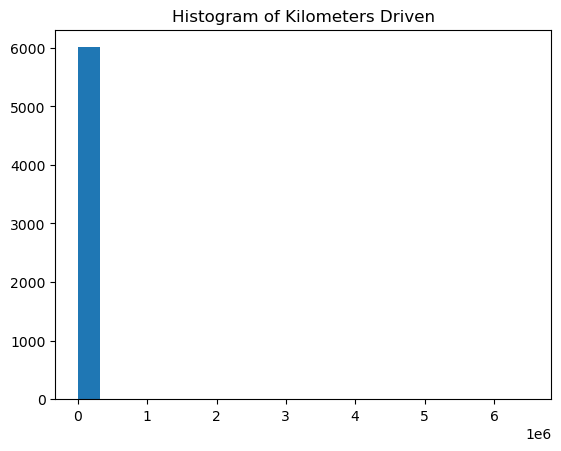

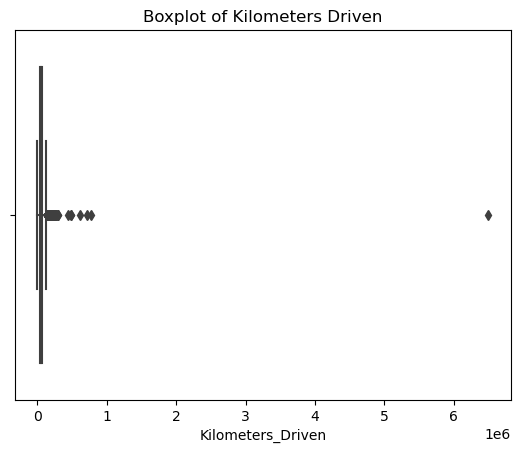

<IPython.core.display.Javascript object>

In [2299]:
plt.hist(CData2["Kilometers_Driven"], 20)
plt.title("Histogram of Kilometers Driven")
plt.show()

sns.boxplot(CData2["Kilometers_Driven"])
plt.title("Boxplot of Kilometers Driven")
plt.show()

`Kilometers_Driven` has a value that is flagged as suspicious by the boxplot, but in the histogram we can see that the distribution is skewed so this point isn't inconsistent with the overall distribution of the data. Nevertheless, having a heavy tail means we might want to consider statistics less sensitive to large values, so e.g. the median may be a better measure of central tendancy. 

In [2300]:
CData2["Kilometers_Driven"] = CData2["Kilometers_Driven"].replace(
    6500000, CData2["Kilometers_Driven"].median()
)

<IPython.core.display.Javascript object>

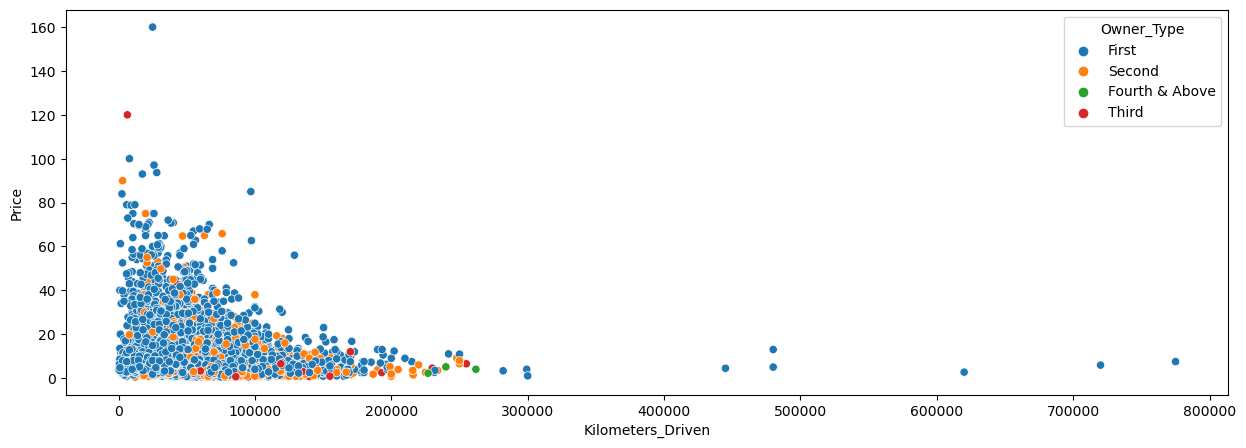

<IPython.core.display.Javascript object>

In [2301]:
# Visualization of the impact of the imputation


figure = plt.figure(figsize=(15, 5))

ax = sns.scatterplot(
    x=CData2["Kilometers_Driven"], y="Price", data=CData2, hue="Owner_Type"
)  # scatter plot

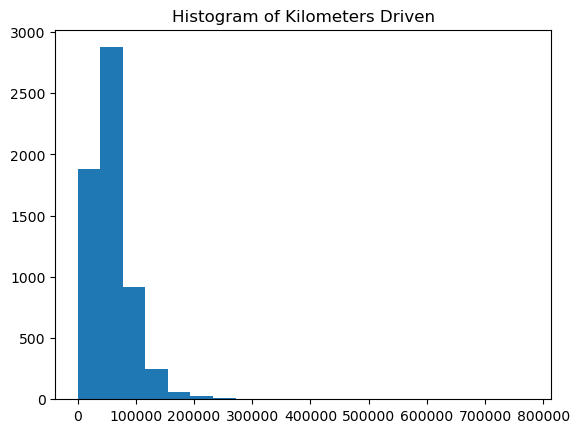

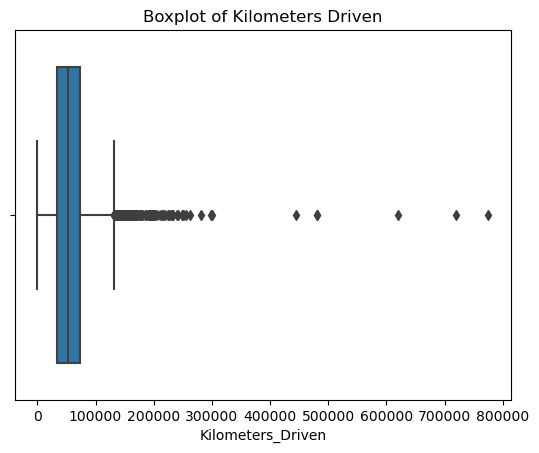

<IPython.core.display.Javascript object>

In [2302]:
plt.hist(CData2["Kilometers_Driven"], 20)
plt.title("Histogram of Kilometers Driven")
plt.show()

sns.boxplot(CData2["Kilometers_Driven"])
plt.title("Boxplot of Kilometers Driven")
plt.show()

* Hereafter, there is less skewness on this variable `Kilometers_Driven`

#### Imputation of outliers in `Mileage` column

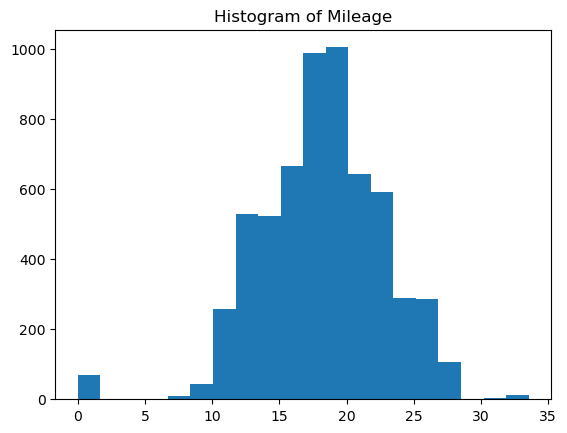

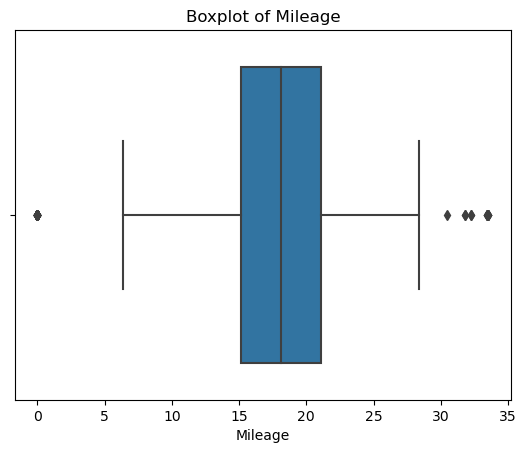

<IPython.core.display.Javascript object>

In [2303]:
plt.hist(CData2["Mileage"], 20)
plt.title("Histogram of Mileage")
plt.show()

sns.boxplot(CData2["Mileage"])
plt.title("Boxplot of Mileage")
plt.show()

`Mileage` has many value that are flagged as suspicious by the boxplot, but in the histogram we can see that the distribution is skewed so this point isn't inconsistent with the overall distribution of the data. Nevertheless, having a heavy tail means we might want to consider statistics less sensitive to large values, so e.g. the median may be a better measure of central tendancy.

#### Values to replace in the column `Mileage`

In [2304]:
CData2["Mileage"].median()

18.15

<IPython.core.display.Javascript object>

In [2305]:
mileage_out = CData2[(CData2["Mileage"] == 0) & CData2["used_cars_age"] != 0]
mileage_out  # df[(df > 95).any(1)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
14          Pune  2012              85000    Diesel    Automatic     Second   
262    Hyderabad  2006              99000    Petrol       Manual      First   
307      Chennai  2006              58000    Petrol       Manual     Second   
424    Hyderabad  2010              42021    Diesel       Manual      First   
443   Coimbatore  2012              50243    Petrol       Manual      First   
631      Chennai  2002              70000    Petrol       Manual      Third   
647       Jaipur  2004             200000    Petrol       Manual      First   
707         Pune  2014             120000    Diesel    Automatic      First   
749       Mumbai  2008              55001    Diesel    Automatic     Second   
915         Pune  2008             103000    Diesel    Automatic     Second   
962       Mumbai  2018               8682    Diesel    Automatic      First   
996         Pune  2008              93000    Petrol       Manual      First   
1059   Hyderabad  2010              58163    Petrol       Manual      First   
1259   Bangalore  2010             125000    Diesel    Automatic     Second   
1308   Bangalore  2014              33000    Diesel    Automatic     Second   
1385        Pune  2004             115000    Petrol       Manual     Second   
1460  Coimbatore  2008              69078    Petrol       Manual      First   
2096  Coimbatore  2004              52146    Petrol       Manual      First   
2130  Coimbatore  2012              51019    Petrol       Manual      First   
2267        Pune  2004             215750    Diesel       Manual     Second   
2343   Hyderabad  2006              74483    Petrol    Automatic      First   
2681   Hyderabad  2010              54000    Petrol    Automatic      First   
2842   Bangalore  2012              43000    Petrol       Manual      First   
3093     Kolkata  2012              24720    Diesel    Automatic     Second   
3189     Chennai  2002              67000    Petrol       Manual      Third   
3210  Coimbatore  2016              22769    Diesel    Automatic      First   
3271   Bangalore  2008              35268    Petrol       Manual     Second   
3522       Kochi  2012              66400    Petrol       Manual      First   
3645   Bangalore  2004             167000    Petrol       Manual      First   
4234     Chennai  2012              63000    Diesel    Automatic      First   
4302       Delhi  2012              61449    Petrol       Manual      First   
4412  Coimbatore  2016              27833    Diesel    Automatic      First   
4687      Jaipur  2012             119203    Diesel    Automatic      First   
5119     Kolkata  2008              45500    Petrol       Manual     Second   
5270   Bangalore  2002              53000    Petrol       Manual     Second   
5311   Hyderabad  2012             139000    Diesel    Automatic      First   
5374   Ahmedabad  2012              66000    Diesel    Automatic      First   
5426     Chennai  2006              85000    Petrol       Manual      Third   
5943     Chennai  2002              75000    Diesel       Manual      First   
5972      Mumbai  2008              65000    Petrol       Manual     Second   

      Mileage  Engine    Power  Seats  New_Price  Price  used_cars_age  \
14        0.0  2179.0  115.000    5.0    120.000  17.50              7   
262       0.0  1086.0   78.900    5.0      4.550   1.75             13   
307       0.0  1086.0   79.450    5.0      4.550   1.50             13   
424       0.0  1968.0   88.800    5.0     10.150   5.45              9   
443       0.0  1086.0   81.860    5.0      4.550   3.35              7   
631       0.0  1086.0   82.000    5.0      4.550   0.65             17   
647       0.0  1086.0   80.365    5.0      4.550   0.80             15   
707       0.0  2987.0  165.000    5.0     49.490  30.00              5   
749       0.0  2179.0  187.740    5.0    120.000  26.50             11   
915       0.0   799.0   93.7

<IPython.core.display.Javascript object>

In [2306]:
mileage_to_replace = mileage_out["Mileage"]
mileage_to_replace.shape  # 40 rows to impute

(40,)

<IPython.core.display.Javascript object>

In [2307]:
CData2["Mileage"] = np.where(
    (CData2.Mileage == 0) & (CData2.used_cars_age != 0),
    CData2["Mileage"].median(),
    CData2.Mileage,
)

<IPython.core.display.Javascript object>

In [2308]:
CData2[(CData2["Mileage"] == 0)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
67    Coimbatore  2019              15369    Diesel    Automatic      First   
544        Kochi  2019              13190    Petrol    Automatic      First   
5875   Ahmedabad  2019               4000    Diesel    Automatic      First   

      Mileage  Engine   Power  Seats  New_Price  Price  used_cars_age  \
67        0.0  1950.0  194.00    5.0      49.14  35.67              0   
544       0.0  1950.0  181.43    5.0      49.49  38.99              0   
5875      0.0  1950.0  194.00    5.0      49.14  35.00              0   

     car_brand_only  old_car?  
67    Mercedes-Benz     False  
544   Mercedes-Benz     False  
5875  Mercedes-Benz     False

<IPython.core.display.Javascript object>

In [2309]:
CData2[(CData2["used_cars_age"] == 0)]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
67    Coimbatore  2019              15369    Diesel    Automatic      First   
135        Kochi  2019              12645    Petrol    Automatic      First   
155        Kochi  2019              14322    Petrol       Manual      First   
173      Kolkata  2019               1000    Petrol       Manual      First   
235        Kochi  2019              14165    Diesel    Automatic      First   
357        Kochi  2019              13747    Petrol    Automatic      First   
434   Coimbatore  2019              24950    Diesel       Manual      First   
512        Kochi  2019               8587    Petrol       Manual      First   
526        Kochi  2019              20667    Petrol       Manual      First   
544        Kochi  2019              13190    Petrol    Automatic      First   
572   Coimbatore  2019              77240    Diesel    Automatic      First   
599   Coimbatore  2019              40674    Diesel    Automatic      First   
796   Coimbatore  2019              19654    Diesel    Automatic      First   
975        Kochi  2019              11209    Diesel    Automatic      First   
1008       Kochi  2019              11571    Petrol       Manual      First   
1010  Coimbatore  2019              23154    Diesel       Manual      First   
1018       Kochi  2019              18592    Diesel       Manual      First   
1032       Kochi  2019               3102    Diesel       Manual      First   
1077       Kochi  2019              34688    Diesel       Manual      First   
1198   Hyderabad  2019               1000    Petrol       Manual      First   
1324  Coimbatore  2019              16862    Petrol       Manual      First   
1361      Mumbai  2019                171    Petrol       Manual      First   
1368       Kochi  2019              18453    Petrol       Manual      First   
1386       Kochi  2019              18373    Diesel    Automatic      First   
1398       Kochi  2019               5377    Petrol       Manual      First   
1474  Coimbatore  2019              17705    Petrol       Manual      First   
1485     Kolkata  2019              80000    Diesel       Manual      First   
1505       Kochi  2019              26013    Diesel    Automatic      First   
1532  Coimbatore  2019              11241    Diesel       Manual      First   
1534  Coimbatore  2019              23882    Petrol       Manual      First   
1583       Kochi  2019               6773    Diesel    Automatic      First   
1797  Coimbatore  2019              20877    Petrol       Manual      First   
1816       Kochi  2019              27339    Petrol       Manual      First   
1877       Kochi  2019              10601    Diesel    Automatic      First   
2095  Coimbatore  2019               2526    Petrol    Automatic      First   
2319  Coimbatore  2019               9312    Diesel    Automatic      First   
2488  Coimbatore  2019              14233    Diesel    Automatic      First   
2492       Kochi  2019              19855    Petrol       Manual      First   
2595  Coimbatore  2019              15379    Petrol    Automatic      First   
2637  Coimbatore  2019              13916    Petrol       Manual      First   
2646      Mumbai  2019               1000    Petrol       Manual      First   
2728       Kochi  2019              13574    Petrol    Automatic      First   
2855       Kochi  2019              21719    Diesel    Automatic      First   
2877       Kochi  2019              29279    Diesel       Manual      First   
2916  Coimbatore  2019               6261    Diesel       Manual      First   
2917  Coimbatore  2019               3906    Petrol    Automatic      First   
3043  Coimbatore  2019              25899    Diesel    Automatic      First   
3059       Delhi  2019              87000    Diesel    Automatic      First   
3116  Coimbatore  2019              32251    Diesel       Manual      First   
3132       Kochi  2019              14298    Petrol    Aut

<IPython.core.display.Javascript object>

* The cars with 0 standard mileage offered by the car company are cars with 0 of age.
* There is no more usd cars having more than 0 year of age with 0 standard mileage offered by the car company

## Variable Transformations

### Let us check the numeric columns for skewness

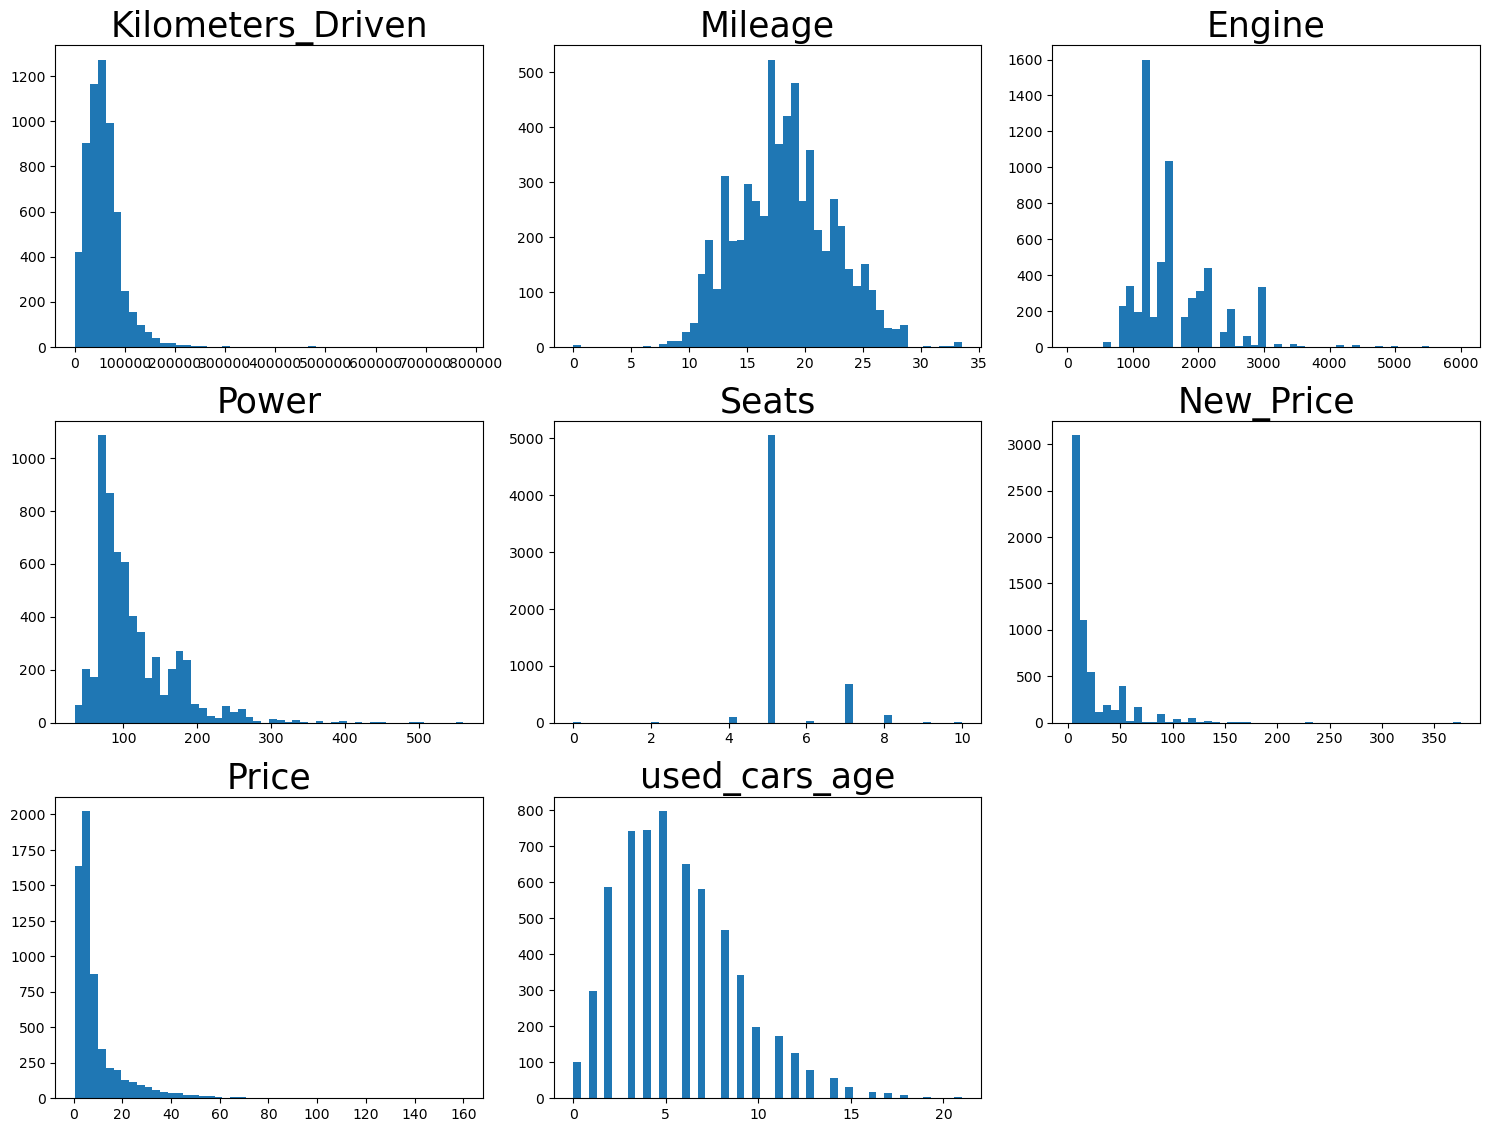

<IPython.core.display.Javascript object>

In [2310]:
# creating a list of non-tag columns
num_cols = [item for item in CData2.select_dtypes(include=np.number).columns]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(CData2[num_cols[i]], bins=50)
    # sns.histplot(data=CData2, x=dist_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

* We see that most of the columns have a very skewed distribution.
* **We will apply the log transformation to the column `New_Price` and `Kilometers_Driven` to deal with skewness in the data.**

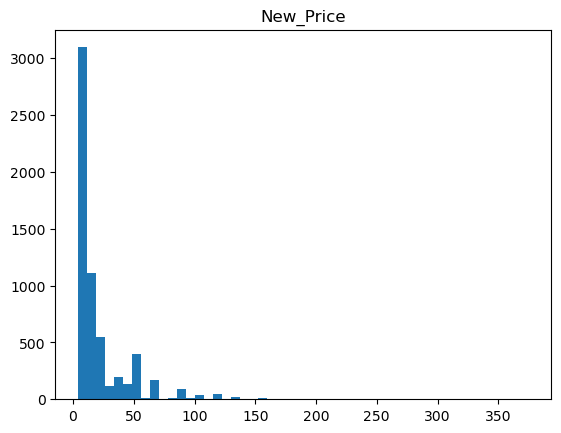

0


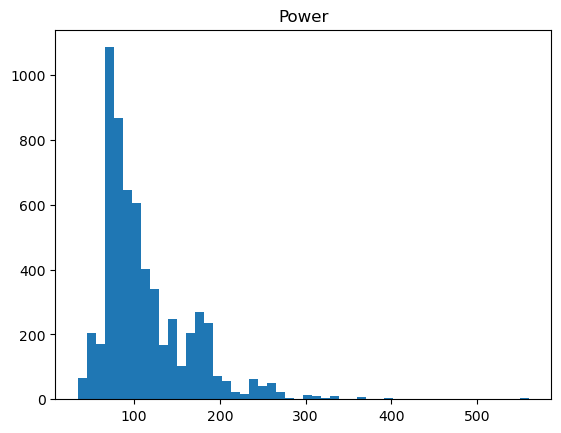

0


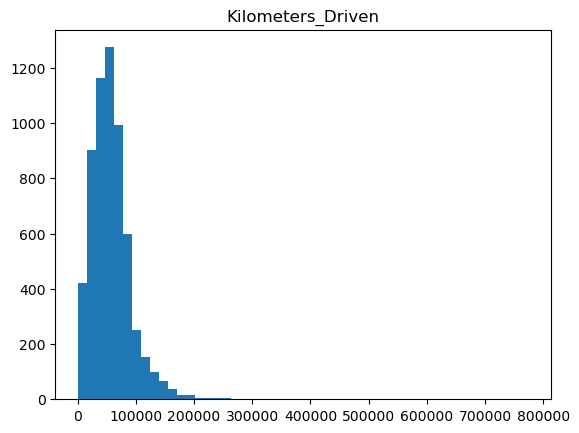

0


<IPython.core.display.Javascript object>

In [2311]:
cols_to_log = ["New_Price", "Power", "Kilometers_Driven"]
for colname in cols_to_log:
    plt.hist(CData2[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(CData2[colname] <= 0))

As there can be some non-positive values (exact zeros for example), we can't directly take the log of these numbers

We have a couple options. One is to just add some small positive value to every element of these columns so that the log is defined on every value in the columnS we're transforming. In this case, since these are like counts, we could just add $1$ since $1$ INR or Km is tiny compared to the values described by these variables, so we're not changing the data in a meaningful way.

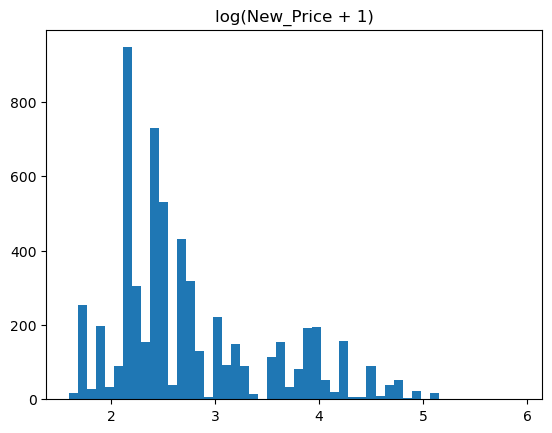

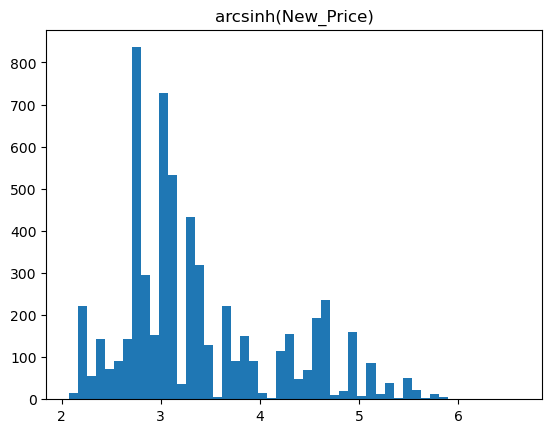

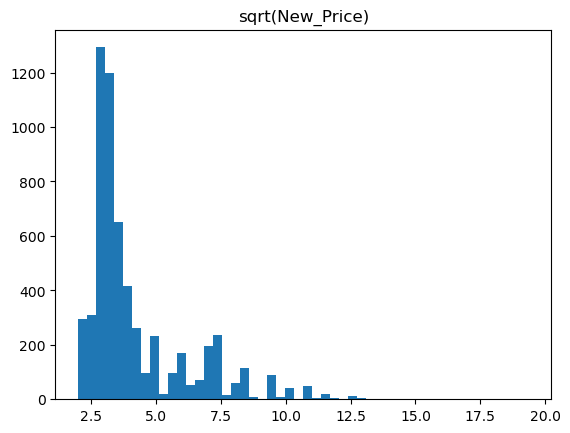

<IPython.core.display.Javascript object>

In [2312]:
plt.hist(np.log(CData2["New_Price"] + 1), 50)
plt.title("log(New_Price + 1)")
plt.show()
plt.hist(np.arcsinh(CData2["New_Price"]), 50)
plt.title("arcsinh(New_Price)")
plt.show()
plt.hist(np.sqrt(CData2["New_Price"]), 50)
plt.title("sqrt(New_Price)")
plt.show()

* The column `New_Price` still skewed, but not as heavily as before with log transformation.

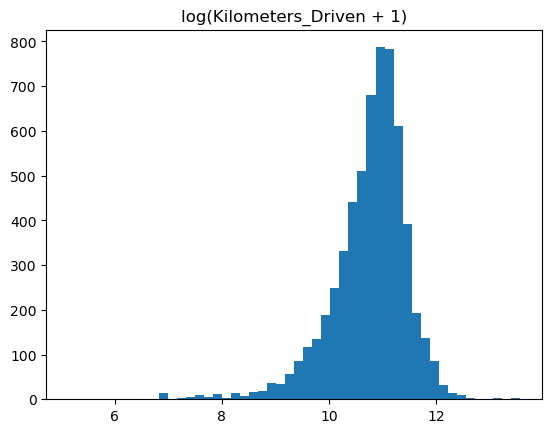

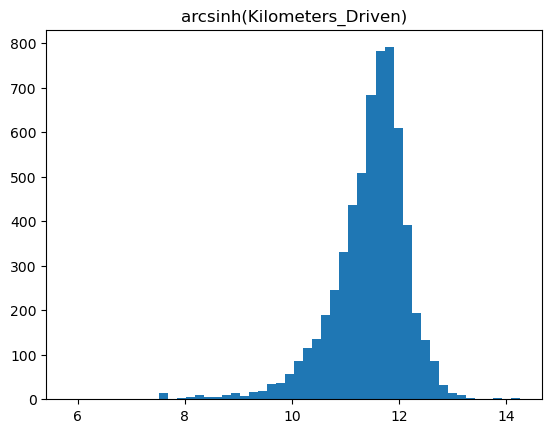

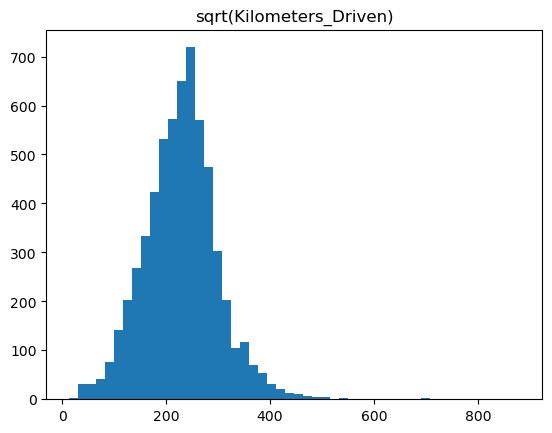

<IPython.core.display.Javascript object>

In [2313]:
plt.hist(np.log(CData2["Kilometers_Driven"] + 1), 50)
plt.title("log(Kilometers_Driven + 1)")
plt.show()
plt.hist(np.arcsinh(CData2["Kilometers_Driven"]), 50)
plt.title("arcsinh(Kilometers_Driven)")
plt.show()
plt.hist(np.sqrt(CData2["Kilometers_Driven"]), 50)
plt.title("sqrt(Kilometers_Driven)")
plt.show()

* The column `Kilometers_Driven` still skewed, after with log transformation.

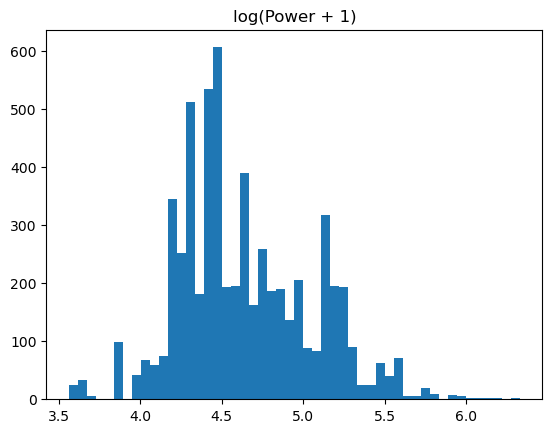

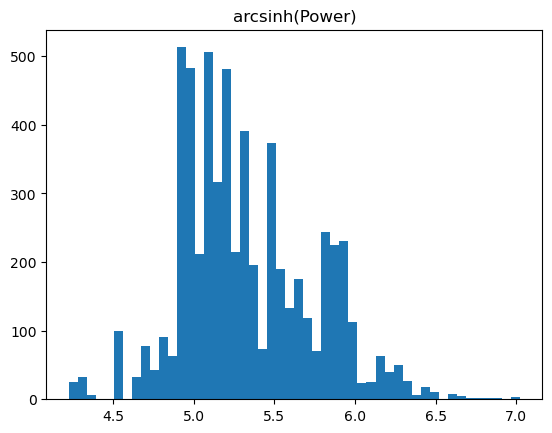

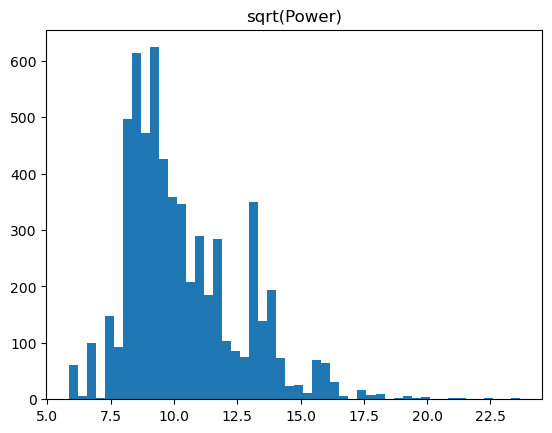

<IPython.core.display.Javascript object>

In [2314]:
plt.hist(np.log(CData2["Power"] + 1), 50)
plt.title("log(Power + 1)")
plt.show()
plt.hist(np.arcsinh(CData2["Power"]), 50)
plt.title("arcsinh(Power)")
plt.show()
plt.hist(np.sqrt(CData2["Power"]), 50)
plt.title("sqrt(Power)")
plt.show()

* The column `Power` still skewed, but not as heavily as before with log transformation.

In [2315]:
# using log transforms on some columns

for colname in cols_to_log:
    CData2[colname + "_log"] = np.log(CData2[colname] + 1)
CData2.drop(
    cols_to_log, axis=1, inplace=True
)  # dropping cols_to_log columns of the dataset

<IPython.core.display.Javascript object>

In [2316]:
CData2.head()

Location  Year Fuel_Type Transmission Owner_Type  Mileage  Engine  Seats  \
0      Mumbai  2010       CNG       Manual      First    26.60   998.0    5.0   
1        Pune  2015    Diesel       Manual      First    19.67  1582.0    5.0   
2     Chennai  2011    Petrol       Manual      First    18.20  1199.0    5.0   
3     Chennai  2012    Diesel       Manual      First    20.77  1248.0    7.0   
4  Coimbatore  2013    Diesel    Automatic     Second    15.20  1968.0    5.0   

   Price  used_cars_age car_brand_only  old_car?  New_Price_log  Power_log  \
0   1.75              9         Maruti     False       1.873339   4.080246   
1  12.50              4        Hyundai     False       2.836737   4.845761   
2   4.50              8          Honda     False       2.262804   4.496471   
3   6.00              7         Maruti     False       2.507157   4.497139   
4  17.74              6           Audi     False       3.991573   4.954418   

   Kilometers_Driven_log  
0              11.184435  
1              10.621352  
2              10.736418  
3              11.373675  
4              10.613271

<IPython.core.display.Javascript object>

**Let's check for skewness after applying the log transformation.**

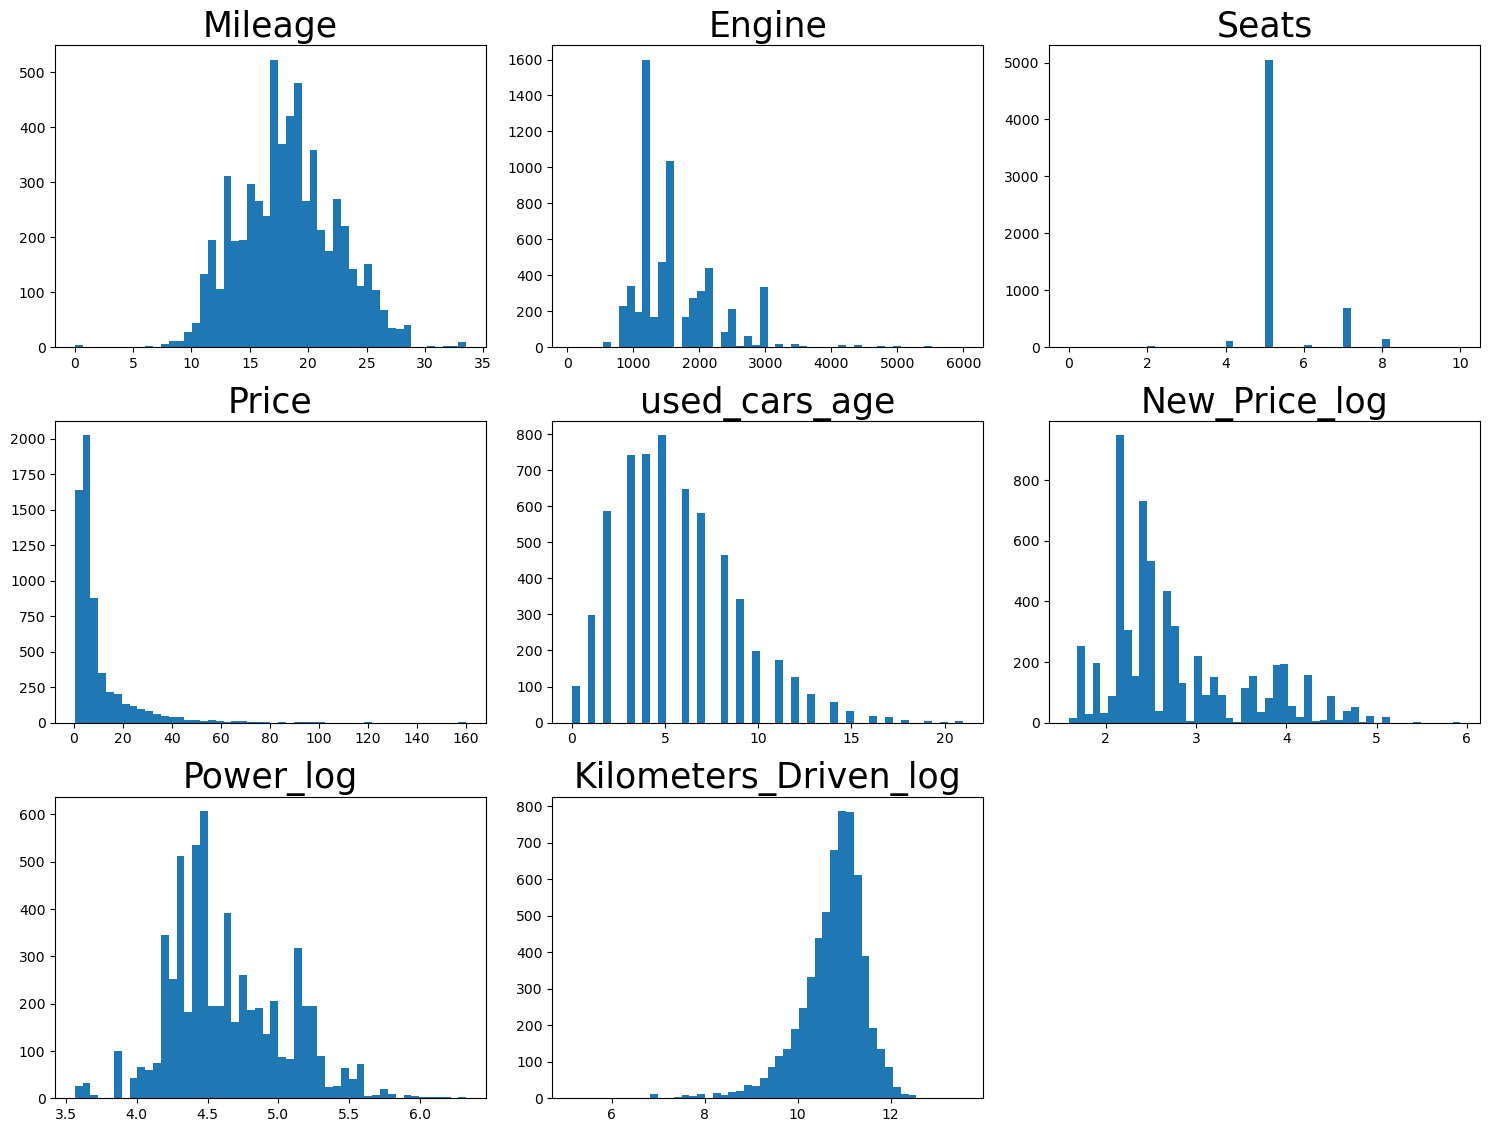

<IPython.core.display.Javascript object>

In [2317]:
# creating a list of non-tag columns
num_cols = [item for item in CData2.select_dtypes(include=np.number).columns]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(CData2[num_cols[i]], bins=50)
    # sns.histplot(data=CData2, x=num_cols[i], kde=True)  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(num_cols[i], fontsize=25)

plt.show()

**Let's check for correlations between the columns**

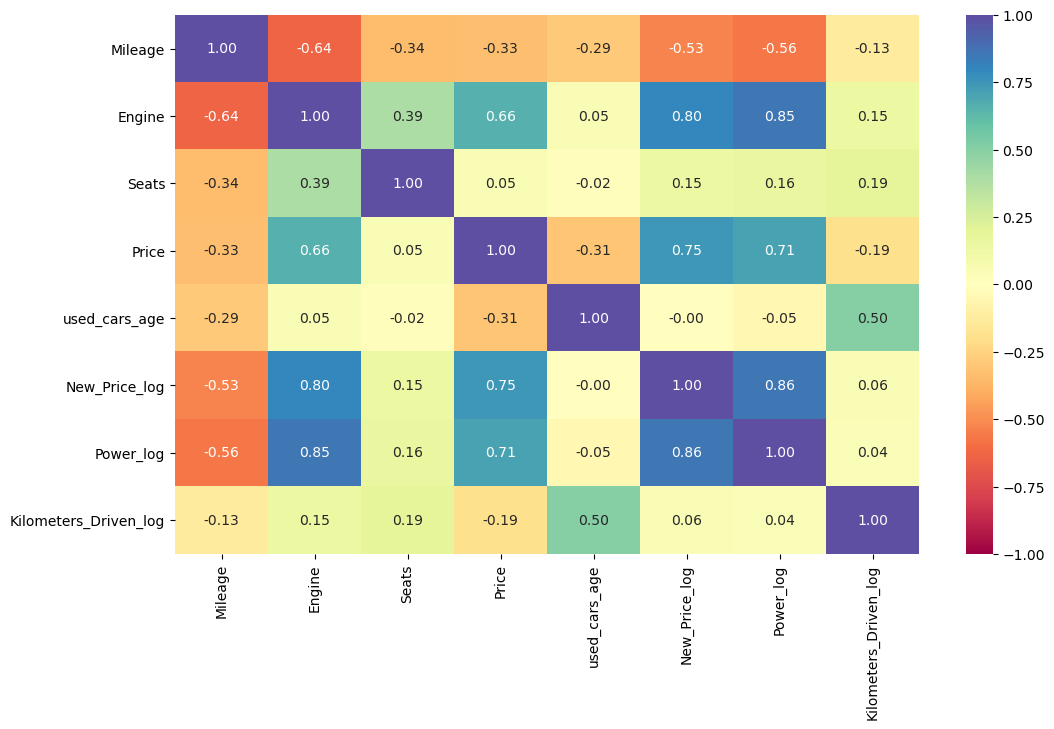

<IPython.core.display.Javascript object>

In [2318]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    CData2[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There are still a few highly correlated columns.

### Making categoricals into categorical types

In [2319]:
cat_vars = [
    "Location",
    "Year",
    "Fuel_Type",
    "Transmission",
    "Owner_Type",
    "car_brand_only",
]
# the other categorical variables have lots of levels
# and I wouldn't dummy encode them as such

for colname in cat_vars:
    CData2[colname] = CData2[colname].astype("category")

CData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6019 non-null   category
 1   Year                   6019 non-null   category
 2   Fuel_Type              6019 non-null   category
 3   Transmission           6019 non-null   category
 4   Owner_Type             6019 non-null   category
 5   Mileage                6019 non-null   float64 
 6   Engine                 6019 non-null   float64 
 7   Seats                  6019 non-null   float64 
 8   Price                  6019 non-null   float64 
 9   used_cars_age          6019 non-null   int64   
 10  car_brand_only         6019 non-null   category
 11  old_car?               6019 non-null   bool    
 12  New_Price_log          6019 non-null   float64 
 13  Power_log              6019 non-null   float64 
 14  Kilometers_Driven_log  6019 non-null   f

<IPython.core.display.Javascript object>

In [2320]:
CData3 = CData2.copy()

<IPython.core.display.Javascript object>

## Model Building

### Model Number 1 : Modeling with the column "Seats" as numerical variable

### Define dependent variable

In [2321]:
X = CData3.drop(["Price"], axis=1)
y = CData3["Price"]

<IPython.core.display.Javascript object>

### Creating dummy variables

In [2322]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

Mileage  Engine  Seats  used_cars_age  old_car?  New_Price_log  Power_log  \
0    26.60   998.0    5.0              9     False       1.873339   4.080246   
1    19.67  1582.0    5.0              4     False       2.836737   4.845761   
2    18.20  1199.0    5.0              8     False       2.262804   4.496471   
3    20.77  1248.0    7.0              7     False       2.507157   4.497139   
4    15.20  1968.0    5.0              6     False       3.991573   4.954418   

   Kilometers_Driven_log  Location_Bangalore  Location_Chennai  \
0              11.184435                   0                 0   
1              10.621352                   0                 0   
2              10.736418                   0                 1   
3              11.373675                   0                 1   
4              10.613271                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Year_1999  Year_2000  Year_2001  Year_2002  Year_2003  Year_2004  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Year_2005  Year_2006  Year_2007  Year_2008  Year_2009  Year_2010  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Year_2011  Year_2012  Year_2013  Year_2014  Year_2015  Year_2016  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Year_2017  Year_2018  Year_2019  Fuel_Type_Diesel  Fuel_Type_Electric  \
0          0          0          0                 0                   0   
1          0          0          0                 1                   0   
2          0          0          0                 0                   0   
3          0          0          0                 1                   0   
4          0          0          0                 1                   0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0              0                 0                    1   
1              0                 0                    1   
2              0                 1                    1   
3              0                 0                    1   
4              0                 0                    0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  \
0                          0                  0              

<IPython.core.display.Javascript object>

### Split the data into train and test

In [2323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [2324]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

### Fitting a linear model

In [2325]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [2326]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

Coefficients
Mileage                          -0.004871
Engine                            0.006699
Seats                            -1.006696
used_cars_age                    -0.504776
old_car?                          0.338908
New_Price_log                     3.415831
Power_log                         2.753971
Kilometers_Driven_log            -1.632339
Location_Bangalore                2.387069
Location_Chennai                  0.895235
Location_Coimbatore               1.760542
Location_Delhi                   -0.158773
Location_Hyderabad                1.844828
Location_Jaipur                   0.718439
Location_Kochi                   -0.481831
Location_Kolkata                 -1.432331
Location_Mumbai                  -0.992422
Location_Pune                     0.458135
Year_1999                         4.745918
Year_2000                         2.918198
Year_2001                         0.786566
Year_2002                         2.084608
Year_2003                         0.693295
Year_2004                         0.969680
Year_2005                        -1.762443
Year_2006                        -0.763591
Year_2007                        -1.992847
Year_2008                        -3.326144
Year_2009                        -3.596948
Year_2010                        -2.525261
Year_2011                        -1.885051
Year_2012                        -1.820169
Year_2013                        -0.496457
Year_2014                        -0.121731
Year_2015                         0.898222
Year_2016                         1.289054
Year_2017                         2.326748
Year_2018                         2.091178
Year_2019                         2.110967
Fuel_Type_Diesel                 -0.859096
Fuel_Type_Electric                6.735727
Fuel_Type_LPG                     2.648340
Fuel_Type_Petrol                 -0.658195
Transmission_Manual              -0.046882
Owner_Type_Fourth & Above        -0.819315
Owner_Type_Second                -0.335447
Owner_Type_Third                  0.345338
car_brand_only_Audi               2.984888
car_brand_only_BMW                2.464770
car_brand_only_Chevrolet         -3.322702
car_brand_only_Ford              -3.654517
car_brand_only_Honda             -4.619254
car_brand_only_Hyundai           -3.284800
car_brand_only_Jaguar             9.632699
car_brand_only_Land              12.540229
car_brand_only_Mahindra          -6.184208
car_brand_only_Maruti            -1.368715
car_brand_only_Mercedes-Benz      2.943530
car_brand_only_Nissan            -4.012629
car_brand_only_Renault           -4.320552
car_brand_only_Skoda             -6.167736
car_brand_only_Tata              -4.074167
car_brand_only_Toyota            -4.394775
car_brand_only_Volkswagen        -4.152805
Intercept                         5.005611

<IPython.core.display.Javascript object>

### Coefficient Interpretations

* 2 Coefficients of log columns are positive. These are `New_Price_log` and `Power_log`
    - Increase in this column will lead to an increase in the price of used cars.
* The coefficient of log column `Kilometers_Driven_log` is positive.
    - Decrease in this column will lead to a decrease in the price of used cars.
* The other coefficients are either positive or negative

### Model performance check

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

* We will define functions to calculate adjusted $R^2$ and MAPE.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We will create a function that will print out all the above metrics in one go.

In [2327]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [2328]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  5.715811  3.25015   0.744497        0.740554  62.18656

<IPython.core.display.Javascript object>

In [2329]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.918049  3.077138   0.796326        0.788838  59.460595

<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.74 and 0.80, indicating that the model explains 74% and 80% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime Price within a mean error of 3.08 on the test set.

- MAPE of 59.46 on the test data means that we are able to predict within ~59% of the Price used cars.

### Model Number 2 : Modeling with the column "Seats" as categorical variable

The column 'Seats' has been considered as numerical and discrete.

How this column can improve the model if we convert it from int to categorical?

In [2330]:
# Conversion to category type
CData2["Seats"] = CData2["Seats"].astype("category")

<IPython.core.display.Javascript object>

In [2331]:
CData2["Seats"].value_counts(dropna=True)

5.0     5055
7.0      675
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

We have one car without seat. We will replace the 0 by the value "is_missing"

In [2332]:
CData2["Seats"] = CData2["Seats"].replace(0.0, "is_missing")

<IPython.core.display.Javascript object>

In [2333]:
CData2["Seats"].value_counts(dropna=True)

5.0           5055
7.0            675
8.0            134
4.0             99
6.0             31
2.0             16
10.0             5
9.0              3
is_missing       1
Name: Seats, dtype: int64

<IPython.core.display.Javascript object>

In [2334]:
CData2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6019 non-null   category
 1   Year                   6019 non-null   category
 2   Fuel_Type              6019 non-null   category
 3   Transmission           6019 non-null   category
 4   Owner_Type             6019 non-null   category
 5   Mileage                6019 non-null   float64 
 6   Engine                 6019 non-null   float64 
 7   Seats                  6019 non-null   category
 8   Price                  6019 non-null   float64 
 9   used_cars_age          6019 non-null   int64   
 10  car_brand_only         6019 non-null   category
 11  old_car?               6019 non-null   bool    
 12  New_Price_log          6019 non-null   float64 
 13  Power_log              6019 non-null   float64 
 14  Kilometers_Driven_log  6019 non-null   f

<IPython.core.display.Javascript object>

#### Define dependent variable

In [2335]:
# Define independant and dependant variables

X2 = CData2.drop(["Price"], axis=1)
y2 = CData2["Price"]

<IPython.core.display.Javascript object>

#### Creating dummy variables

In [2336]:
# we will create dummy variables for the categorical columns

X2 = pd.get_dummies(
    X2,
    columns=X2.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X2.head()

Mileage  Engine  used_cars_age  old_car?  New_Price_log  Power_log  \
0    26.60   998.0              9     False       1.873339   4.080246   
1    19.67  1582.0              4     False       2.836737   4.845761   
2    18.20  1199.0              8     False       2.262804   4.496471   
3    20.77  1248.0              7     False       2.507157   4.497139   
4    15.20  1968.0              6     False       3.991573   4.954418   

   Kilometers_Driven_log  Location_Bangalore  Location_Chennai  \
0              11.184435                   0                 0   
1              10.621352                   0                 0   
2              10.736418                   0                 1   
3              11.373675                   0                 1   
4              10.613271                   0                 0   

   Location_Coimbatore  Location_Delhi  Location_Hyderabad  Location_Jaipur  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    1               0                   0                0   

   Location_Kochi  Location_Kolkata  Location_Mumbai  Location_Pune  \
0               0                 0                1              0   
1               0                 0                0              1   
2               0                 0                0              0   
3               0                 0                0              0   
4               0                 0                0              0   

   Year_1999  Year_2000  Year_2001  Year_2002  Year_2003  Year_2004  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Year_2005  Year_2006  Year_2007  Year_2008  Year_2009  Year_2010  \
0          0          0          0          0          0          1   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   Year_2011  Year_2012  Year_2013  Year_2014  Year_2015  Year_2016  \
0          0          0          0          0          0          0   
1          0          0          0          0          1          0   
2          1          0          0          0          0          0   
3          0          1          0          0          0          0   
4          0          0          1          0          0          0   

   Year_2017  Year_2018  Year_2019  Fuel_Type_Diesel  Fuel_Type_Electric  \
0          0          0          0                 0                   0   
1          0          0          0                 1                   0   
2          0          0          0                 0                   0   
3          0          0          0                 1                   0   
4          0          0          0                 1                   0   

   Fuel_Type_LPG  Fuel_Type_Petrol  Transmission_Manual  \
0              0                 0                    1   
1              0                 0                    1   
2              0                 1                    1   
3              0                 0                    1   
4              0                 0                    0   

   Owner_Type_Fourth & Above  Owner_Type_Second  Owner_Type_Third  Seats_2.0  \
0                          0                  0                 0          0   
1           

<IPython.core.display.Javascript object>

#### Split Data

In [2337]:
# Split X and y into training and test set in 70:30 ratio

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X2, y2, test_size=0.3, random_state=1
)

<IPython.core.display.Javascript object>

In [2338]:
print("Number of rows in train data =", X_train2.shape[0])
print("Number of rows in test data =", X_test2.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


<IPython.core.display.Javascript object>

#### Fitting a linear model

In [2339]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train2, y_train2)

LinearRegression()

<IPython.core.display.Javascript object>

**Let us check the coefficients and intercept of the model, which are the parameters we learned.**

In [2340]:
coef_df2 = pd.DataFrame(
    np.append(lin_reg_model2.coef_, lin_reg_model2.intercept_),
    index=X_train2.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df2

Coefficients
Mileage                          -0.022097
Engine                            0.004930
used_cars_age                    -0.487718
old_car?                         -0.038069
New_Price_log                     3.212890
Power_log                         3.744176
Kilometers_Driven_log            -1.342889
Location_Bangalore                2.336987
Location_Chennai                  1.053358
Location_Coimbatore               1.709316
Location_Delhi                   -0.192276
Location_Hyderabad                1.852081
Location_Jaipur                   0.691228
Location_Kochi                   -0.510143
Location_Kolkata                 -1.312562
Location_Mumbai                  -0.826495
Location_Pune                     0.482907
Year_1999                         4.669619
Year_2000                         1.883176
Year_2001                         0.993070
Year_2002                         1.448206
Year_2003                         0.577018
Year_2004                         1.293462
Year_2005                        -1.350694
Year_2006                        -0.415357
Year_2007                        -1.771183
Year_2008                        -3.008016
Year_2009                        -3.196901
Year_2010                        -2.660243
Year_2011                        -2.225117
Year_2012                        -2.017725
Year_2013                        -0.771295
Year_2014                        -0.441683
Year_2015                         0.698344
Year_2016                         1.158582
Year_2017                         2.354516
Year_2018                         2.379837
Year_2019                         2.346350
Fuel_Type_Diesel                 -0.294522
Fuel_Type_Electric                8.680421
Fuel_Type_LPG                     2.969984
Fuel_Type_Petrol                 -0.496564
Transmission_Manual               0.029946
Owner_Type_Fourth & Above        -1.629304
Owner_Type_Second                -0.377122
Owner_Type_Third                  0.177022
Seats_2.0                        32.181760
Seats_4.0                        15.542864
Seats_5.0                         8.519341
Seats_6.0                         5.454725
Seats_7.0                         8.958262
Seats_8.0                         8.087912
Seats_9.0                         6.022784
Seats_10.0                        6.191387
car_brand_only_Audi               4.178016
car_brand_only_BMW                3.659148
car_brand_only_Chevrolet         -3.097093
car_brand_only_Ford              -3.093149
car_brand_only_Honda             -3.881031
car_brand_only_Hyundai           -2.714622
car_brand_only_Jaguar            10.898685
car_brand_only_Land              14.221392
car_brand_only_Mahindra          -6.706986
car_brand_only_Maruti            -1.177156
car_brand_only_Mercedes-Benz      4.138103
car_brand_only_Nissan            -3.232462
car_brand_only_Renault           -3.727306
car_brand_only_Skoda             -5.006038
car_brand_only_Tata              -4.783930
car_brand_only_Toyota            -4.165517
car_brand_only_Volkswagen        -3.462217
Intercept                       -13.894432

<IPython.core.display.Javascript object>

### Coefficient Interpretations

* 2 Coefficients of log columns are positive. These are `New_Price_log` and `Power_log`
    - Increase in this column will lead to an increase in the price of used cars.
* The coefficient of log column `Kilometers_Driven_log` is positive.
    - Decrease in this column will lead to a decrease in the price of used cars.
* The other coefficients are either positive or negative

### Model performance check

In [2341]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf2 = model_performance_regression(
    lin_reg_model2, X_train2, y_train2
)
lin_reg_model_train_perf2

Training Performance



RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  5.552318  3.147334   0.758904        0.754771  60.011347

<IPython.core.display.Javascript object>

In [2342]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf2 = model_performance_regression(
    lin_reg_model2, X_test2, y_test2
)
lin_reg_model_test_perf2

Test Performance



RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.739889  2.932702   0.810815        0.803069  57.376382

<IPython.core.display.Javascript object>

**Observations**

- The train and test $R^2$ are 0.76 and 0.81, indicating that the model explains 76% and 81% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable.

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict anime Price within a mean error of 2.93 on the test set.

- MAPE of 57.4 on the test data means that we are able to predict within ~57% of the Price used cars.

## Conclusions

* We have been able to build a predictive model that can be used by Cars4U to predict the price of used cars with an $R^2$ of 0.759 on the training set and 0.811 on the testing set.

- **Based on the performance of the 2 models built, the model to choose is the second model because it achieves a greater performance than the first. 
So, converting the column `Seats` from numeric to category type increase the model performance.**

* Cars4U can use this model to predict the the price of used cars within a mean error of 2.93 on the test set.

* We found that the logarithm of the price of a new car and the logarithm of the maximum power of the engine are some of the factors which tend to increase the price of the used car.

* We found that  logarithm of the total kilometers driven is one of the factors which tends to decrease the price of the used car.

* We improved our linear regression model performance by applying non-linear transformation (log transformation) to some of the attributes.

* The tech start-up Cars4U can also explore non-linear models, which might be able to better identify the patterns in the data to predict the anime 
ratings with even higher accuracy.